In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
%matplotlib inline

import time
from tqdm import tqdm
from pandas.api.types import is_numeric_dtype
from sklearn.base import TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.neighbors import KNeighborsClassifier
from collections import Counter
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import train_test_split, KFold, StratifiedKFold
from sklearn.preprocessing import MinMaxScaler, RobustScaler
from sklearn.decomposition import TruncatedSVD
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.under_sampling import TomekLinks
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import ADASYN
from imblearn.combine import SMOTEENN
from imblearn.combine import SMOTETomek
from imblearn.pipeline import Pipeline as imbpipeline
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, recall_score, precision_score, average_precision_score, auc, f1_score
import shap
import dice_ml
from dice_ml import Dice

# not advisable, but we do it for a cleaner report
# warnings regarding non-convergence of some classifiers used are muted
import warnings 
warnings.filterwarnings("ignore")

Matplotlib created a temporary config/cache directory at /tmp/matplotlib-t48b8pes because the default path (/home/mgaspar/.cache/matplotlib) is not a writable directory; it is highly recommended to set the MPLCONFIGDIR environment variable to a writable directory, in particular to speed up the import of Matplotlib and to better support multiprocessing.


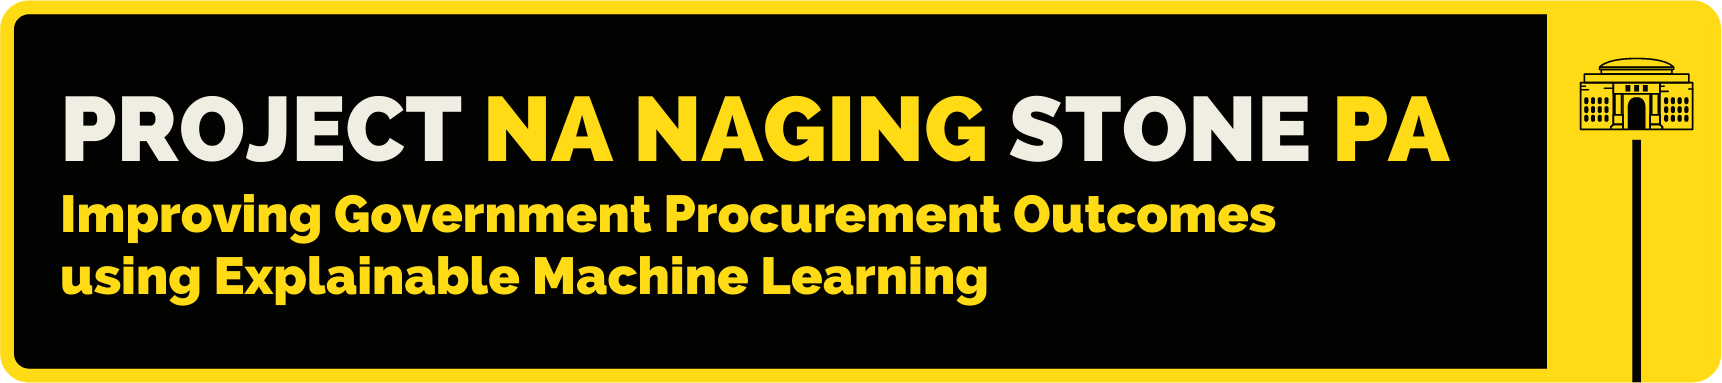

<center>by <b>John Raymond Barajas, Alyssa Fuentebella, Manuel John Paul Gaspar, Jazel Jayme, Anna Dominique Ramos, & Michael Tanjangco</b></center>
<center>Machine Learning 2 | MSDS 2022 | Asian Institute of Management</center>
<center>Submitted 3rd December 2021</center>

# Introduction

Every year when we plan our national budget we spend trillions of pesos in government procurement to buy goods and services for the public's benefit. Last 2014, the government budget for procured items was Php 1.076 trillion; this was a reduction from the Php 2.093 trillion recorded in 2013 [1]. For 2021, it is expected that a higher value is possible, as more than 70 billion alone was allotted just for vaccine procurement [2].

## The Procurement Process
Such large amounts of money can provide an opportunity for corruption. To prevent this, the implementing rules and regulations of the procurement law (RA 9184) are regularly updated, the latest of which was in 2016. Generally it follows the following process:

<br>
<center><left><b><font size=2> Figure 1. General Procurement Process </font></b></left>
<br>
<font size=2><font color="gray">This process is done sequentially</font></font></center>

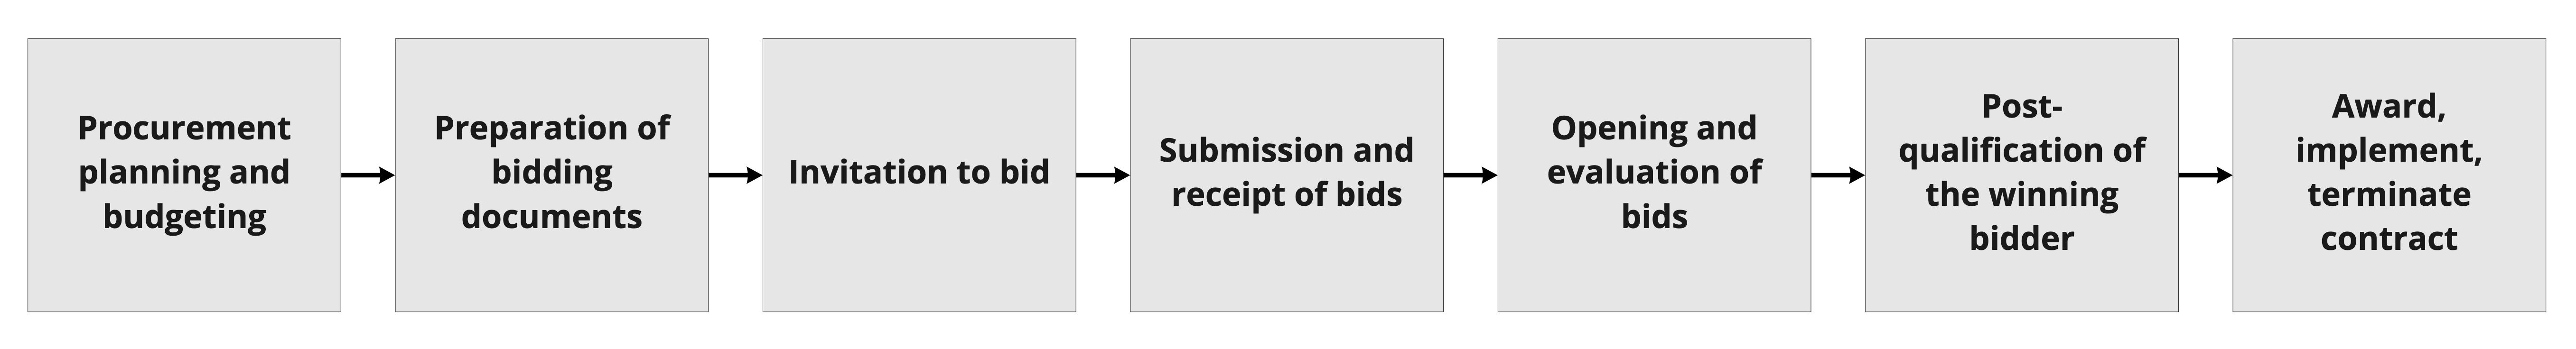

## Challenges in the Procurement Process
Clearly, the above process follows international standards on government procurement to ensure transparency and accountability at each step of the process. However, this has not prevented the longer wait times for both the procuring entity and the bidder; in fact, there were lower bid acceptance rates as well. In 2020, only 3 out of 10 projects were successfully awarded. 

Thus, while the IRR may have prevented opportunities for corruption, it may have indirectly promoted underutilization of the national budget: when procurement processes are long and costly, the government fails to deliver what is needed by the population, especially in times of emergency. Recently, the Department of Health has been put in focus given the procurement of nearly expired drugs and medicines - the reason of which was largely attributed to the long and costly process of procurement. 

## Significance/Motivation
Challenges in the procurement process affects the following:
1. For the government, this low acceptance rate doesn’t just mean failed bids, it means that they failed in giving the Filipino public something they needed.
2. For the bidders on the other hand, those failed bids cost them not just time but the opportunity to have pursued other more successful initiatives.

If we can improve the procurement outcomes for both the goverment and the companies/bidders, we can ensure that we are able to deliver the needs and priorities of the entire population at the right place and at the right time.

## Research Question
This study aims to answer the main research question, **"How can we improve procurement outcomes using explainable machine learning?"**

- How might we improve procurement outcomes for the government as a **procuring entity**?
- How might we improve procurement outcomes for the companies/bidders as the **service providers**?

## Scope and Limitations
We evaluated a few limitations of this report, and have taken steps to minimize them wherever possible:

1. **Data limitations and context**. We have limited the scope of this study to include 2020 data only. This means that analysis will be limited to all available data in the PhilGEPS website during that year, including the context of which procurement processes were in (e.g. disruptions in processes were expected given that the goverment implemented travel restrictions). We think this is in line with our motivation - that is, to improve procurement outcomes - much more so in times of emergency like a pandemic.

2. **No additional verification on the data collected**. We did not consider other sources of information in order to validate what we downloaded from PhilGEPS in the interest of time. Data provided in the analysis are thus examined with the presumption of regularity.

# Data
## Dataset Description
The Philippine Government Electronic Procurement System or PhilGEPS was created by law to provide for a single and centralized portal for information on government procurement. All procurement-related information are required to be entered into the database by the requesting offices within the government; in turn, companies/bidders review information in PhilGEPS to select which they can bid for and where. We limited our data to 2020 because:

1. This is the latest available dataset where information is complete for an entire year of procurement bids/purchases.
2. This was the start of government travel restrictions on the COVID-19 pandemic, which posed challenges on business continuity on both the side of the procuring entity and the bidders. Nevertheless, it is important to note that the government allows for emergency procurement: meaning, it can fast-track procurement processes in times of emergency so the goverment can quickly provide value and services to the population when it is most needed.

Finally, we narrowed down our analysis further to two locations only (Metro Manila and Cotabato), the reasons of which are discussed in the sections below.
<br><br>
<center><left><b><font size=2> Table 1. Summary Statistics of the Data </font></b></left>
<br>
<font size=2><font color="gray">Each of the following was obtained from the PhilGEPS Website</font></font></center>


| Column Name | Details  | Type |
|:---|:---|:---:|
| Organization Name | Name of the procuring entity | string |
| Notice Title | Title of the bid | string |
| Publish Date | Date bid was published | date |
| Classification | Class of the bid | string |
| Notice Type | Type of the bid | string |
| Business Category | Business category of the bid | string |
| Funding Source | Which funding source it comes from | string |
| Funding Instrument | Which funding instrument it comes from | string |
| Procurement Mode | Type of procurement mode | string |
| Trade Agreement | Type of trade agreement | string |
| Approved Budget of the Contract | Total approved budget of the contract | float |
| Area of Delivery | Location of the delivery | string |
| Contract Duration | Total days of the contract | float |
| Calendar Type | Type of duration (e.g. days, months, years) | string |
| Item Name | Name of items to be procured | string |
| Item Desc | Description of items to be procured | string |
| Item Budget | Budget of items to be procured | float |
| PreBid Date | Date the prebid was set | date |
| Closing Date | Date the bids will close | date |
| Notice Status | Type of bid notice | string |
| Award Title | Title of the award | string |
| Award Type | Type of the award | string |
| UNSPSC Description | Description following the UNSPSC | string |
| Awardee Corporate Title | Corporate title of the awardee | string |
| Contract Amount | Amount of the contract | float |
| Publish Date(Award) | Date when the award was published | date |
| Award Date | Date when it was awarded | date |
| Notice to Proceed Date | Date when the winning bidder can proceed | date |
| Contract Efectivity Date | Date when the contract starts | date |
| Contract End Date | Date when the contract ends | date |
| Reason for Award | Details on reason for the award | string |
| Award Status | Type of award | string |
| Days Multiplier | Multiplication of calendar type with contract duration to standardize | float |
| Contract Duration (Days) | Total duration of contract  | float |
| Publish-NTP (Days) | Difference between the publish date and NTP | float |
| Publish-Award (Days) | Difference between the publish date and award date | float |
| Publish-Closing (Days) | Difference between the publish date and closing date | float |
| Award-NTP (Days) | Difference between the award date and NTP | float |
| Year | Year when it was awarded | integer |
| Quarter | Quarter when it was awarded | integer |

## Summary Statistics
<br>
<center><left><b><font size=2> Table 2. Summary Statistics of the Data </font></b></left>
<br>
<font size=2><font color="gray">Each of the following was obtained from the PhilGEPS Website</font></font></center>

|  | Approved Budget of the Contract | Contract Duration | Item Budget | Contract Amount | Contract Duration (Days) |
|---:|---:|---:|---:|---:|---:|
| count | 8.407140e+05 | 840714.000000 | 8.407140e+05 | 8.407140e+05 | 840714.000000 |
| mean | 5.473564e+06 | 22.228874 | 1.729138e+06 | 9.279758e+05 | 41.814630 |
| std | 7.871259e+08 | 66.501824 | 3.586296e+07 | 3.812084e+07 | 3369.790905 |
| min | 0.000000e+00 | 0.000000 | -1.000000e+00 | 0.000000e+00 | 0.000000 |
| 25% | 8.805000e+04 | 3.000000 | 1.200000e+04 | 0.000000e+00 | 3.000000 |
| 50% | 2.000000e+05 | 10.000000 | 1.700000e+05 | 0.000000e+00 | 10.000000 |
| 75% | 6.848385e+05 | 30.000000 | 5.593711e+05 | 3.566175e+04 | 30.000000 |
| max | 6.350006e+11 | 9500.000000 | 2.016284e+10 | 2.010234e+10 | 727560.000000 |

All in all, we have obtained 840,714 bids. The highest recorded `Approved Budget of the Contract` is Php 635,000,553,880.00; the mean is at Php 5,473,563.71.  The average `Contract Duration` is at 22 days. Implications of both the budget and contract duration are discussed at length later in this report.

# Methodology

With the underlying questions this work is attempting to solve, the high level overview shown in **Figure 2** was implemented in this project, and are briefly discussed below:

<br>
<center><left><b><font size=2> Figure 2. Overview of Methodology </font></b></left>
<br>
<font size=2><font color="gray">These items are detailed below</font></font></center>

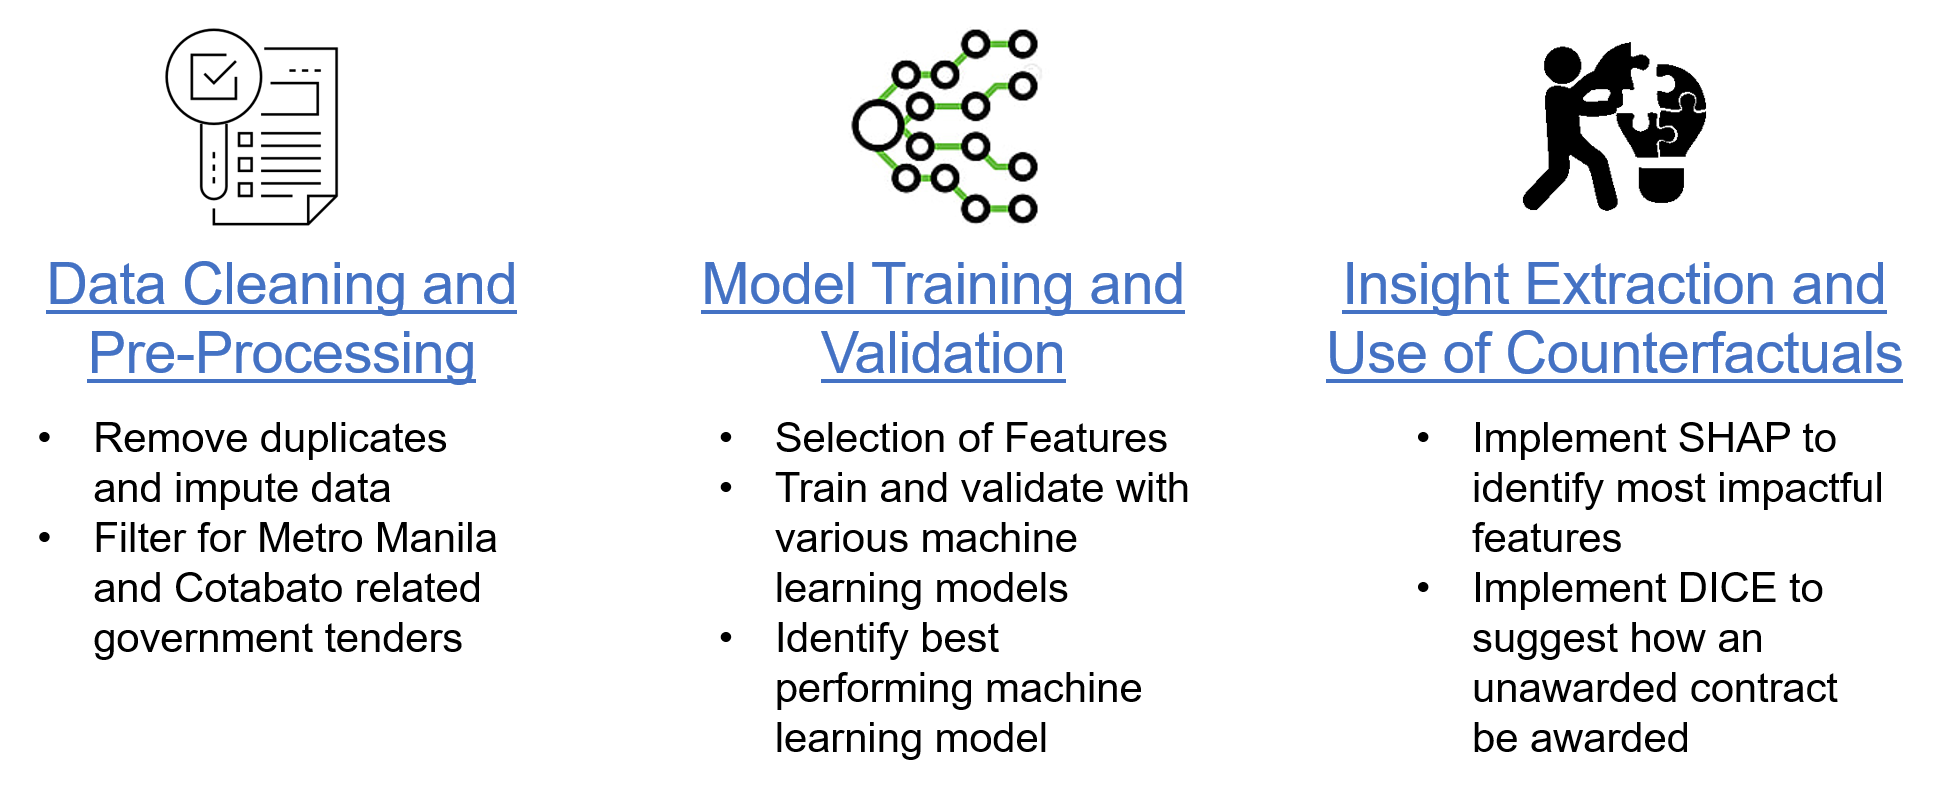

1. The open standard procurement dataset from the Philippine Government Electronic Procurement System (PhilGEPS) was cleaned and pre-processed. <br><br>

2. Cleaning and pre-processing was done in order to remove duplicates, handle missing values with data imputation, and filter only for **Metro Manila** and **Cotabato** related contracts - of which **Metro Manila** is the richest and has the highest number of awarded contracts and **Cotabato** is the poorest among the provinces in the Philippines. <br><br>

3. After the data has been cleaned and pre-processed, the data was fed to various machine learning models in order to identify the model that best predicts whether a government tender will be awarded or not. Resampling was also done in order to handle the imbalance within the cleaned and pre-processed dataset. <br><br>

4. Insights were then derived from the most impactful features through the aid of `SHAP`. <br><br>

5. Finally, from these derived insights, actionable recommendations were suggested to a number of unawarded contracts through the use of Diverse Counterfactual Explanations ([`DICE`](https://github.com/interpretml/DiCE)).

The succeeding sections provide further details of this implemented methodology.

## Data Cleaning and Pre-Processing

### Reading of Procurement Data as a Pandas DataFrame

The Philippine procurement data for 2020 as made available in PhilGEPS as open standard dataset for bids and award notices was first downloaded [3]. This data is made available as `xlsx` files and is divided into four parts which represent the quarters of year 2020. Once the data was downloaded, this data was then read and merged into a single dataframe. It is worth noting that the headers of this data is not consistent across all quarters in the year of 2020. Hence, procurement data on Jul-Sep 2017 was used in order to have uniform header for the 2020 procurement data. This is implemented in the succeeding cells below.

In [2]:
location = '/home/msds2022/mgaspar/lt3/ml2/project/data/'

df_jan_mar_2020 = pd.read_excel(location +\
    'Bid Notice and Award Details Jan-Mar 2020.xlsx', skiprows=3)
df_apr_jun_2020 = pd.read_excel(location +\
    'Bid Notice and Award Details Apr-Jun 2020.xlsx', skiprows=3)
df_jul_sept_2020 = pd.read_excel(location +\
    'Bid Notice and Award Details Jul-Sep 2020.xlsx', skiprows=3)
df_oct_dec_2020 = pd.read_excel(location +\
    'Bid Notice and Award Details Oct-Dec 2020.xlsx', skiprows=3)

In [3]:
# combine 2020 data into 1 dataframe
df_proc_2020 = pd.concat([df_jan_mar_2020, df_apr_jun_2020,
                         df_jul_sept_2020, df_oct_dec_2020])

In [4]:
# change reference ID into str
df_proc_2020['Reference ID'] = df_proc_2020['Reference ID'].astype(str)

In [5]:
# make column names of df_proc_2020 consistent
df_jul_sept_2017 = pd.read_excel(location+\
    'Bid Notice and Award Details Jul-Sep 2017.xlsx', skiprows=3)
col_names_2017 = df_jul_sept_2017.columns
df_proc_2020.columns = col_names_2017

In [6]:
# Change Contract Amount Column of SUC Procurement Data to Numeric Column
df_proc_2020['Contract Amount'] = df_proc_2020[
    'Contract Amount'].replace(',','', regex=True)
df_proc_2020['Contract Amount'] = df_proc_2020[
    'Contract Amount'].replace('-','', regex=True)
df_proc_2020['Contract Amount'] = df_proc_2020[
    'Contract Amount'].replace(' ','', regex=True)
df_proc_2020['Contract Amount'] = df_proc_2020[
    'Contract Amount'].replace('',np.nan, regex=True)
df_proc_2020['Contract Amount'] = df_proc_2020[
    'Contract Amount'].replace('NULL',np.nan, regex=True)
df_proc_2020['Contract Amount'] = df_proc_2020[
    'Contract Amount'].astype(float)

In [7]:
df_proc_2020['Reference ID'].value_counts()

6813451    775
7214126    666
6962790    543
7100333    515
6945336    487
          ... 
6966563      1
6966544      1
6966284      1
6965489      1
7392933      1
Name: Reference ID, Length: 567012, dtype: int64

Some contracts have same Reference ID. The reason for this is because 1 contract ID can have multiple items but belonging on the same contract. We can drop duplicated contracts and keep the first.

In [8]:
# drop duplicates
df_proc_2020 = df_proc_2020.drop_duplicates(subset=['Reference ID'], keep='first')

### Exploratory Data Analysis

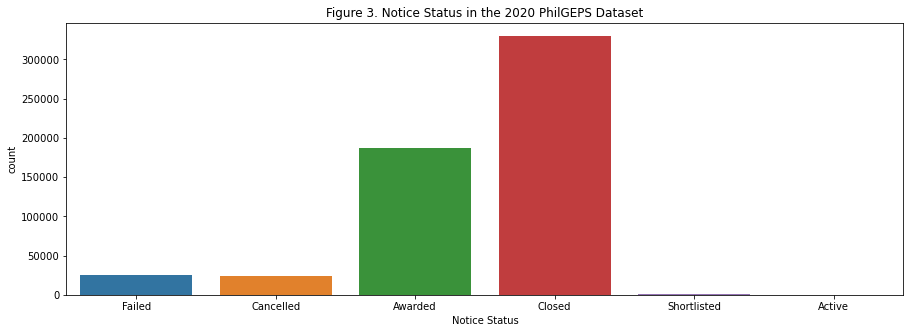

In [31]:
plt.figure(figsize=(15,5))
sns.countplot(df_proc_2020['Notice Status'])
plt.title('Figure 3. Notice Status in the 2020 PhilGEPS Dataset')
plt.show()

In [13]:
df_proc_2020['Notice Status'].value_counts(normalize=True)

Closed         0.581963
Awarded        0.330303
Failed         0.044934
Cancelled      0.042103
Shortlisted    0.000690
Active         0.000007
Name: Notice Status, dtype: float64

Above, we see that only 33% of contracts are `Awarded`. Most were tagged as `Closed`. This means that the bidding has ended, and the procuring entity has the choice to `postpone`, `fail`, or `cancel` the bid. 

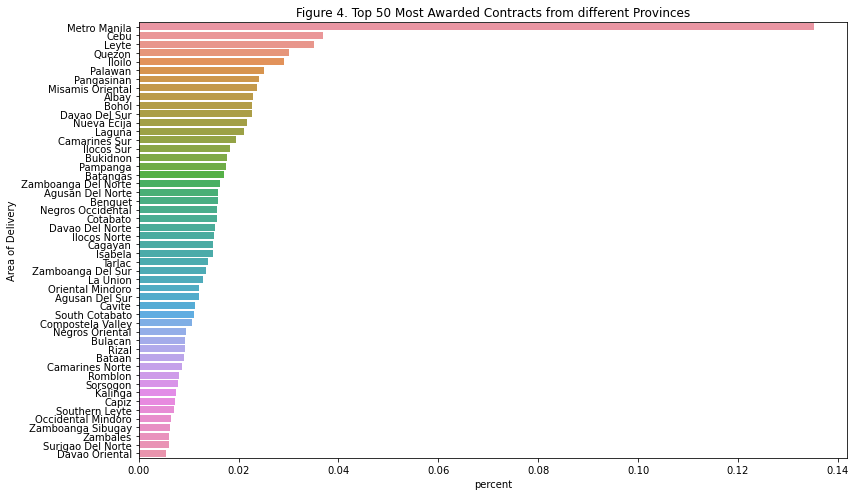

In [32]:
df_awards = pd.DataFrame(df_proc_2020[df_proc_2020['Notice Status']=='Awarded']['Area of Delivery'].value_counts(normalize=True))
df_awards = df_awards.reset_index()
df_percent = df_awards.rename(columns={'index': 'Area of Delivery', 'Area of Delivery': 'percent'})
df_percent = df_percent.reset_index(drop=True)

plt.figure(figsize=(12,7))
sns.barplot(x='percent',y='Area of Delivery', data=df_percent[:50])
plt.title('Figure 4. Top 50 Most Awarded Contracts from different Provinces')
plt.tight_layout()
plt.show()

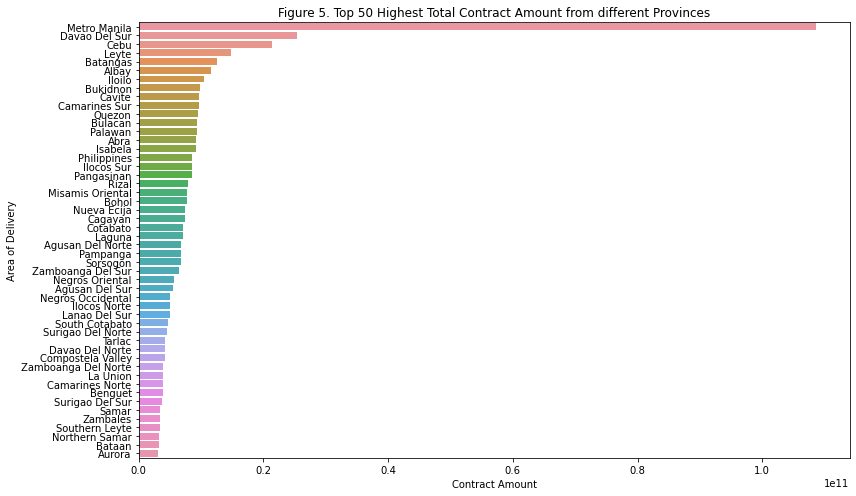

In [33]:
df = df_proc_2020[df_proc_2020['Notice Status']=='Awarded']
df_contract = pd.DataFrame(df.groupby('Area of Delivery')['Contract Amount'].sum()).reset_index()
df_contract = df_contract.sort_values(by=['Contract Amount'], ascending=False)

plt.figure(figsize=(12,7))
sns.barplot(x='Contract Amount',y='Area of Delivery', data=df_contract[:50])
plt.title('Figure 5. Top 50 Highest Total Contract Amount from different Provinces')
plt.tight_layout()
plt.show()

Looking at the Top 50 Most Awarded Contracts and the Top 50 Highest Total Contract Amount from different provinces, we see that Metro Manila is the top, as most administrative offices are based in here. This means that, for some procured items, it is the national office that procures and then distributes to the different regional or municipal offices afterwards. For example, the Department of Health purchases some drugs on its own and then distributes it to health centers nationwide.

Interestingly, Davao Del Sur ranked 10th in terms of number of contracts awarded. However, it is the second highest total contract amount rewarded.

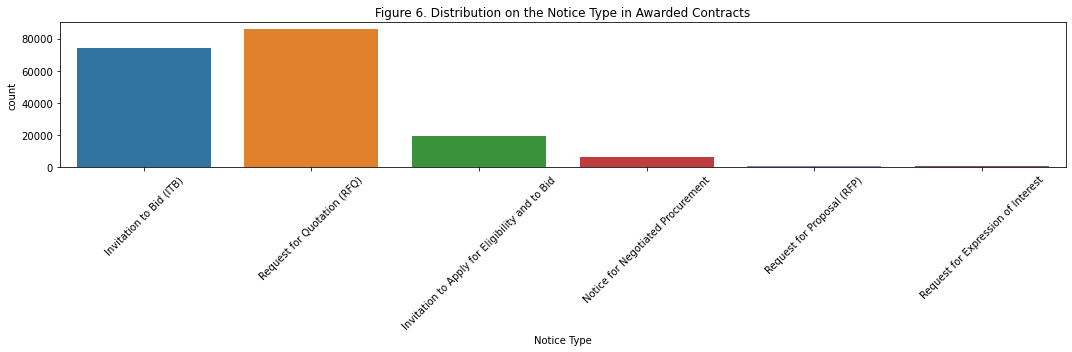

In [35]:
plt.figure(figsize=(15, 5))
sns.countplot(df['Notice Type'])
plt.xticks(rotation=45)
plt.title('Figure 6. Distribution on the Notice Type in Awarded Contracts')
plt.tight_layout()
plt.show()

Most `Notice Type`s for the awarded contracts were done through a `Request for Quotation (RFQ)`, which are usually done if the budget is less than a certain threshold. Above a certain threshold, the `Invitation to Bid (ITB)` and `Invitation to Apply for Eligibility and to Bid` are usually done given the larger budget.

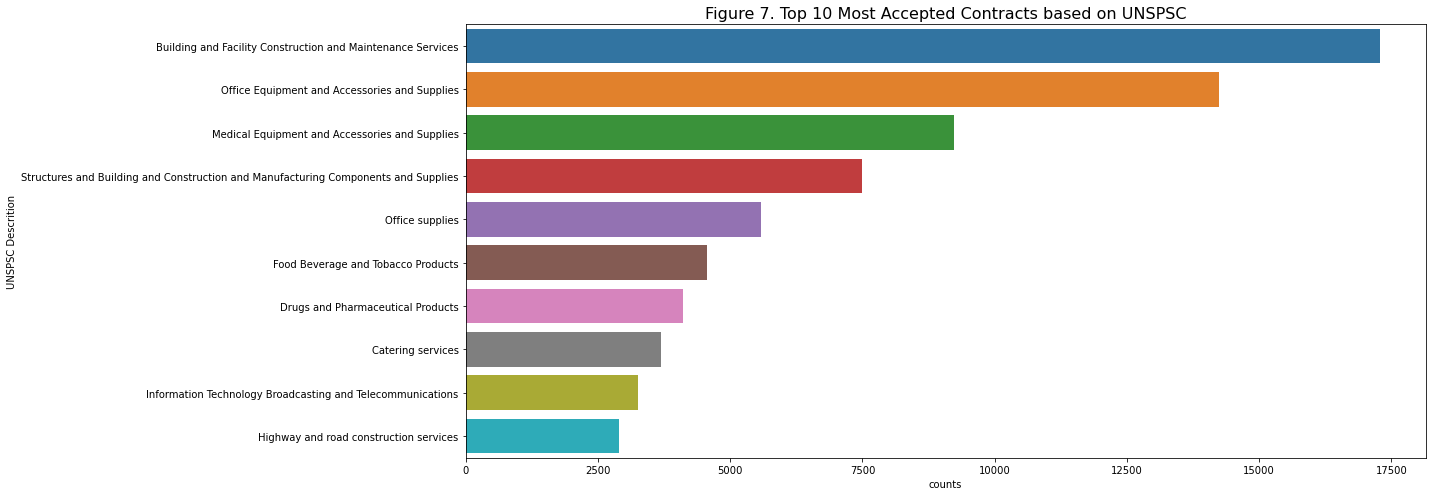

In [36]:
df_10 = pd.DataFrame(df_proc_2020['UNSPSC Description'].value_counts()[:10]).reset_index()
df_10.rename(columns={'index': 'UNSPSC Descrition', 'UNSPSC Description': 'counts'}, inplace=True)

plt.figure(figsize=(20, 7))
sns.barplot(y='UNSPSC Descrition', x='counts', data=df_10)
plt.title('Figure 7. Top 10 Most Accepted Contracts based on UNSPSC', fontsize=16)
plt.tight_layout()
plt.show()

`UNSPSC` stands for `United Nations Standard Products and Services Code`. It is a global classification system of products and services. Most procured items are expectedly related to `Building and Facility Construction and Maintenance`, given that this is an administrative priority by the current administration. 

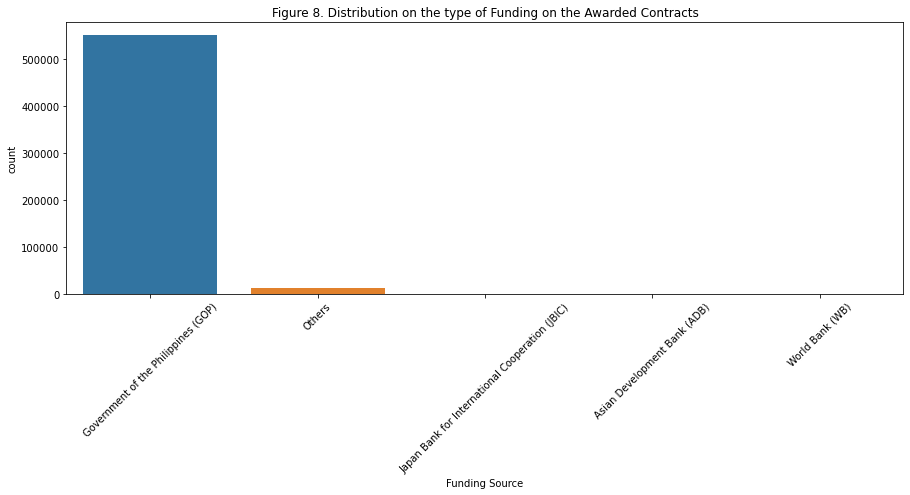

In [38]:
plt.figure(figsize=(15,5))
sns.countplot(df_proc_2020['Funding Source'])
plt.title('Figure 8. Distribution on the type of Funding on the Awarded Contracts')
plt.xticks(rotation=45);

Finally, contracts can be classified according to the type of funding. Overwhelmingly, the budget for almost all procured items are sourced from the `Government of the Philippines (GOP)` without the need for external funding.

We use the above exploration as guide in the next steps of our paper. In particular, we use these preliminary insights to deep dive on and understand the important features that can be used to improve procurement outcomes.

### Cleaning and Pre-Processing of Procurement Data

Prior to machine learning model training and validation runs, the 2020 procurement data needs to be pre-processed and cleaned first. It could be noted that the `Contract Duration` feature in the dataset had different units. Hence, the units were first made uniform across all tenders by converting these using the `Calendar Type` feature as reference. The date columns of this dataset (e.g. `Publish Date`, `PreBid Date`) were also inputted as strings and not as time stamps. This was then also converted to datetime in order to perform more operations on these columns. Laslty, the length of bidding was also extracted by getting the difference (in days) between the `Publish Date` and the posted `Closing Date`. These are implemented in the succeeding cells below.

In [12]:
# calculate for Contract Duration to Days Multiplier
# for consistency: 1 month = 30 days: 1 year = 12 months = 360 days
df_proc_2020['Calendar Type'].unique()
num_days = {'Day/s': 1, 'Month/s': 30, 'Year/s': 360, np.nan: 1}
df_proc_2020['Days Multiplier'] = df_proc_2020['Calendar Type']
df_proc_2020['Days Multiplier'] = df_proc_2020[
    'Days Multiplier'].replace(num_days)
df_proc_2020['Contract Duration (Days)'] = df_proc_2020.apply(
    lambda row: (row['Days Multiplier']*row['Contract Duration']), axis=1)

In [13]:
# convert date columns to date time data types
date_cols = ['Publish Date', 'PreBid Date', 'Closing Date', 'Publish '
             'Date(Award)', 'Award Date', 'Notice to Proceed Date', 
             'Contract Efectivity Date', 'Contract End Date']
for i in date_cols:
    df_proc_2020[i] = pd.to_datetime(df_proc_2020[i].str.replace(
        '24:|25:|26:|27:|28:|29:|30:|31:|32:|33:|34:|35:|36:'
        '|37:|38:|39:|40:|41:|42:|43:|44:|45:|46:|47:|48:|49:|'
        '50:|51:|52:|53:|54:|55:|56:|57:|58:|59:','00:'))

In [14]:
# difference (days) between closing date and publish date
df_proc_2020['Publish-Closing (Days)'] = df_proc_2020[
    'Closing Date'] - df_proc_2020['Publish Date']
df_proc_2020['Publish-Closing (Days)'] = pd.to_numeric(df_proc_2020[
    'Publish-Closing (Days)'].dt.days, downcast='integer')

In [15]:
# create Quarter Column
df_proc_2020['Quarter'] = df_proc_2020['Publish Date'].dt.quarter

Initial exploration of the data also revealed that there are duplicate entries in the contracts (i.e. same contracts but having different line items) posted for the fiscal year of 2020. So these duplicate contracts were thus removed. It followed as well that there is a significant number of `NULL` values in the 2020 procurement data. Hence, each feature that had missing values was dealt accordingly. These pre-processing steps were implemented in the succeeding cells below.

In [16]:
# drop duplicates
df_proc_2020 = df_proc_2020.drop_duplicates(subset=['Reference ID'], keep='first')

In [17]:
# create deep copy of cleaned dataframe
df_proc_2020_clean = df_proc_2020.copy(deep=True)

In [18]:
# check for null values
df_proc_2020_clean.isnull().sum()

Organization Name                       0
Reference ID                            0
Solicitation No.                       66
Notice Title                            0
Publish Date                            0
Classification                          0
Notice Type                             0
Business Category                       0
Funding Source                          0
Funding Instrument                      0
Procurement Mode                        0
Trade Agreement                         0
Approved Budget of the Contract         0
Area of Delivery                    46219
Contract Duration                    3449
Calendar Type                       19540
Line Item No                       365564
Item Name                          365565
Item Desc                          365570
Quantity                           365564
UOM                                365564
Item Budget                        365564
PreBid Date                        436917
Closing Date                      

In [19]:
# replace null values under Area of Delivery with "Others"
df_proc_2020_clean['Area of Delivery'] = df_proc_2020_clean[
    'Area of Delivery'].fillna('Others')

# replace null values under Contract Duration with mean of Contract Duration
# column
df_proc_2020_clean['Contract Duration'] = df_proc_2020_clean[
    'Contract Duration'].fillna(
    value=df_proc_2020_clean['Contract Duration'].mean())

# replace null values under Item Name with "None"
df_proc_2020_clean['Item Name'] = df_proc_2020_clean[
    'Item Name'].fillna('None')

# replace null values under Item Desc with "None"
df_proc_2020_clean['Item Desc'] = df_proc_2020_clean[
    'Item Desc'].fillna('None')

# replace null values under Quantity with mean of Quantity Column
df_proc_2020_clean['Quantity'] = df_proc_2020_clean[
    'Quantity'].fillna(value=df_proc_2020_clean['Quantity'].mean())

# replace null values under Item Budget with mean of Item Budget Column
df_proc_2020_clean['Item Budget'] = df_proc_2020_clean[
    'Item Budget'].fillna(value=df_proc_2020_clean['Item Budget'].mean())

# replace null values under Award Title with "None"
df_proc_2020_clean['Award Title'] = df_proc_2020_clean[
    'Award Title'].fillna('None')

# replace null values under Award Type with "None"
df_proc_2020_clean['Award Type'] = df_proc_2020_clean[
    'Award Type'].fillna('None')

# replace null values under Awardee Corporate Title with "None"
df_proc_2020_clean['Awardee Corporate Title'] = df_proc_2020_clean[
    'Awardee Corporate Title'].fillna('None')

# replace null values under Contract Amount with 0
df_proc_2020_clean['Contract Amount'] = df_proc_2020_clean[
    'Contract Amount'].fillna(0)

# replace null values under Reason for Award with "Not Awarded"
df_proc_2020_clean['Reason for Award'] = df_proc_2020_clean[
    'Reason for Award'].fillna('Not Awarded')

# replace null values under Award Status with "Not Awarded"
df_proc_2020_clean['Award Status'] = df_proc_2020_clean[
    'Award Status'].fillna('Not Awarded')

# replace null values under Contract Duration (Days) with mean of Contract 
# Duration (Days) column
df_proc_2020_clean['Contract Duration (Days)'] = df_proc_2020_clean[
    'Contract Duration (Days)'].fillna(
    value=df_proc_2020_clean['Contract Duration (Days)'].mean())

# replace null values under Publish-PreBid (Days) with 0
df_proc_2020_clean['Publish-Closing (Days)'] = df_proc_2020_clean[
    'Publish-Closing (Days)'].fillna(0)

In [20]:
# write to csv cleaned file
# df_proc_2020_clean.to_csv('Cleaned PhilGEPS 2020 Data.csv')

### Filtering of Procurement Data for Metro Manila and Cotabato

Once the cleaning and pre-processing of the 2020 procurementdata was done, this data was filtered for contracts that are related to `Metro Manila` and `Cotabato` areas. `Metro Manila` and `Cotabato` areas were selected due to the fact that former had the highest allocated budget and highest number of awarded contracts in 2020 while the latter is the poorest province in the country. Two separate machine learning models will be trained for these areas since these areas have clearly different characteristics with each other. The filtering done for the 2020 procurement data is implemented in the succeeding cells below.

In [42]:
# filter for Manila only
df_dept_manila = df_proc_2020_clean.loc[df_proc_2020_clean['Area of Delivery'].str.contains('Metro Manila')]

In [43]:
# filter for Cotabato only
df_dept_cotabato = df_proc_2020_clean.loc[df_proc_2020_clean['Area of Delivery'].str.contains('Cotabato')]

In [44]:
# define Manila target column
df_dept_target_manila = df_dept_manila['Notice Status'].map({'Closed': 0, 'Cancelled': 0, 'Awarded': 1, 'Failed': 0, 'Shortlisted': 0, 'Active': 0})
df_dept_target_manila.value_counts()

0    51198
1    11373
Name: Notice Status, dtype: int64

In [45]:
# define Cotabato target column
df_dept_target_cotabato = df_dept_cotabato['Notice Status'].map({'Closed': 0, 'Cancelled': 0, 'Awarded': 1, 'Failed': 0, 'Shortlisted': 0, 'Active': 0})
df_dept_target_cotabato.value_counts()

0    15623
1     1615
Name: Notice Status, dtype: int64

In [46]:
# drop Manila target column
df_dept_manila.drop('Notice Status', axis=1, inplace=True)

In [47]:
# drop Cotabato target column
df_dept_cotabato.drop('Notice Status', axis=1, inplace=True)

### Machine Learning Model Training and Validation

For convenience, the training and validation set, and the holdout set were given an arbitrary split of **75%** and **25%**, respectively. A stratified k-fold of **5 splits** was used in order to determine the recall scores for the holdout sets. Five machine learning models were used in this implementation and these are: (1) `LogisticRegression`, (2) `GaussianNB`, (3) `RandomForestClassifier`, (4) `DecisionTreeClassifier`, and (5) `GradientBoostingClassifier`.

The filtered data both for `Metro Manila` and `Cotabato` were found to be imbalanced. Hence, these imbalanced data were balanced using three different resampling techniques - `SMOTEENN`, `SMOTETomek`, and `Random Under Sampling`. 

Tuning was also performed in order to increase the recall scores observed for the best performing model. It is worth noting however that the default parameters for the best performing model still garnered the highest recall scores and the default parameters were thus used. 

Finally, for this dataset, only 11 out of the 40 features were selected since the remaining features were solely for awarded contracts. These features were deliberately removed from the model training and validation runs due to the fact that these features will largely induce bias towards the prediction of awarded contracts.

### Machine Learning Model Explanation

In order to derive insights from the best performing machine learning model, SHAP was used to determine the implications of the most impactful features observed [4]-[5]. Bee Swarm plots and as well as feature important plots were used to identify which of the features had the most impact to the model output and extract insights from the observed results. Moreover, through the use of `DICE`, suggestions (i.e. counterfactual explanations) were also derived on what features of a government tender should be changed in order to increased its chances of being awarded in the next cycle of procurement [6].

# Results and Discussion

Now that the pipeline for this work has been established, substantial insights for `Metro Manila` and `Cotabato` were derived from the best performing models. Through the aid of `SHAP` and `DICE`, the practical implications of the observed results were explored. The succeeding sections discusses further the implications of the findings derived from this project.

## Derived Insights for Metro Manila

The succeeding sections provides discussion on what insights were derived on government tenders posted for areas within `Metro Manila`.

### Preparation of Numeric and Categorical Features

For easier facilitation of the training and validation runs, the numeric and categoric columns for Metro Manila were individually selected and then finally merged into a single feature containing dataframe. The target column which is the `Notice Status` - the feature that tells whether a government tender was awarded or not - was also separately extracted. This data then were finally split accordingly, resampled, and trained with various machine learning models.

In [68]:
# placeholder
df_dept = df_dept_manila
df_dept_target = df_dept_target_manila

In [69]:
# extract numeric columns from data from cleaned data
numeric = ['Approved Budget of the Contract', 'Contract Duration (Days)',
           'Publish-Closing (Days)', 'Quarter']
df_proc_2020_numeric = df_dept[numeric]

In [70]:
# extract categoric columns from data from cleaned data
categoric = ['Classification', 'Notice Type', 'Business Category',
               'Funding Source', 'Funding Instrument',
               'Procurement Mode', 'Trade Agreement']
df_proc_2020_categoric = df_dept[categoric]

In [71]:
# create dummy variables for categoric datafrmae
df_proc_2020_categoric_ohe = pd.get_dummies(
    df_proc_2020_categoric, columns = categoric)

In [72]:
# concat dataframe
df_proc_2020_feature = pd.concat([df_dept['Organization Name'],
                          df_dept['Reference ID'],
                          df_proc_2020_numeric, df_proc_2020_categoric_ohe], axis=1)

In [73]:
# reset index (for training and splitting, and backtracking)
df_proc_2020_feature_indexed = df_proc_2020_feature.reset_index(drop=True)

In [74]:
# extract feature column
df_feature = df_proc_2020_feature_indexed.drop(['Organization Name', 'Reference ID'], axis=1)

### Training and Validation Results for Metro Manila

In order to determine what model best predicts whether a given contract will be awarded or not, five different machine learning models were tested in accordance to the metrics as previously discussed. `SMOTEENN`, `SMOTETOMEK`, and `Random Under Sampling` were also used to balance the procurement dataset. The results for the training and validation of the data are given in the succeeding cells below.

In [82]:
# initialize inputs: trainval and holdout set, use stratify=y, test_size=0.25

X, y = df_feature, df_dept_target # edit here

# scale data using standard scaler
# scaler = StandardScaler()
# X_scaled = pd.DataFrame(scaler.fit_transform(X))

(X_trainval, X_holdout, y_trainval, y_holdout) = train_test_split(X, y, # edit X here to include X_scaled in base case
                                           random_state=11, test_size=0.25, 
                                           stratify=y) # default

In [83]:
# refer to this website for the list of metrics: https://scikit-learn.org/stable/modules/model_evaluation.html
metric = 'recall'

In [84]:
# scaler
min_max = MinMaxScaler()

In [85]:
# resampling techniques
# refer to this website for more resampling techniques: https://imbalanced-learn.org/stable/references/under_sampling.html
smoteenn = SMOTEENN(random_state=11)
smotetomek = SMOTETomek(random_state=11)
random_under_sampler = RandomUnderSampler(random_state=11)

In [86]:
# initialize models with default hyperparamters
models_dict = {
    'LogisticRegressor': LogisticRegression(),
    'GaussianNB': GaussianNB(),
    'RandomForestClassifier': RandomForestClassifier(random_state=11),
    'DecisionTreeClassifier': DecisionTreeClassifier(random_state=11),
    'GradientBoostingClassifier': GradientBoostingClassifier(random_state=11)   
}

In [87]:
# scale data
X_trainval_scaled = min_max.fit_transform(X_trainval)

#### Resample with SMOTEENN

In [88]:
X_trainval_resampled, y_trainval_resampled = smoteenn.fit_resample(X_trainval_scaled, y_trainval)

In [89]:
X_trainval_resampled = pd.DataFrame(X_trainval_resampled, columns=X.columns)

In [90]:
# budget automl
skf = StratifiedKFold(n_splits=5)

res = {}

# log start time
total_start = time.time()

for model_name, model in tqdm(models_dict.items()):
    train_scores = []
    val_scores = []
    holdout_scores = []
    
    for train_index, val_index in skf.split(X_trainval_resampled, y_trainval_resampled):
        X_train, X_val = X_trainval_resampled.iloc[train_index], X_trainval_resampled.iloc[val_index]
        y_train, y_val = y_trainval_resampled.iloc[train_index], y_trainval_resampled.iloc[val_index]
        
        start_time = time.time() # for logging run times
        
        # fit
        model.fit(X_train, y_train)
        
        # predict
        y_pred_train = model.predict(X_train)
        y_pred_val = model.predict(X_val)
        y_pred_holdout = model.predict(X_holdout)
        
        # default metric: accuracy
        train_score = recall_score(y_train, y_pred_train)
        val_score = recall_score(y_val, y_pred_val)
        holdout_score = recall_score(y_holdout, y_pred_holdout)
        
        end_time = time.time() # for logging run times
        
        train_scores.append(train_score)
        val_scores.append(val_score)
        holdout_scores.append(holdout_score)
        
    res[model_name] = {
        'ave_train_recall':np.mean(train_scores) * 100,
        'ave_val_recall':np.mean(val_scores) * 100,
        'ave_holdout_recall':np.mean(holdout_scores) * 100,
        'run_time': end_time - start_time
    }

# log end time
total_end = time.time()

elapsed = total_end - total_start
print(f"Report Generated in {elapsed:.2f} seconds")
display(pd.DataFrame(res).T)

100%|██████████| 5/5 [03:33<00:00, 42.77s/it]

Report Generated in 213.88 seconds


,ave_train_recall,ave_val_recall,ave_holdout_recall,run_time
LogisticRegressor,70.750218,70.539738,0.000000,1.403245
GaussianNB,81.320524,80.618341,0.000000,0.397936
RandomForestClassifier,99.963319,97.739738,30.495955,8.168148
DecisionTreeClassifier,99.938865,96.925764,41.195920,0.786895
GradientBoostingClassifier,80.425328,79.856769,28.737249,32.030376


#### Resample with SMOTETOMEK

In [91]:
X_trainval_resampled, y_trainval_resampled = smotetomek.fit_resample(X_trainval_scaled, y_trainval)

In [92]:
X_trainval_resampled = pd.DataFrame(X_trainval_resampled, columns=X.columns)

In [93]:
# budget automl
skf = StratifiedKFold(n_splits=5)

res = {}

# log start time
total_start = time.time()

for model_name, model in tqdm(models_dict.items()):
    train_scores = []
    val_scores = []
    holdout_scores = []
    
    for train_index, val_index in skf.split(X_trainval_resampled, y_trainval_resampled):
        X_train, X_val = X_trainval_resampled.iloc[train_index], X_trainval_resampled.iloc[val_index]
        y_train, y_val = y_trainval_resampled.iloc[train_index], y_trainval_resampled.iloc[val_index]
        
        start_time = time.time() # for logging run times
        
        # fit
        model.fit(X_train, y_train)
        
        # predict
        y_pred_train = model.predict(X_train)
        y_pred_val = model.predict(X_val)
        y_pred_holdout = model.predict(X_holdout)
        
        # default metric: accuracy
        train_score = recall_score(y_train, y_pred_train)
        val_score = recall_score(y_val, y_pred_val)
        holdout_score = recall_score(y_holdout, y_pred_holdout)
        
        end_time = time.time() # for logging run times
        
        train_scores.append(train_score)
        val_scores.append(val_score)
        holdout_scores.append(holdout_score)
        
    res[model_name] = {
        'ave_train_recall':np.mean(train_scores) * 100,
        'ave_val_recall':np.mean(val_scores) * 100,
        'ave_holdout_recall':np.mean(holdout_scores) * 100,
        'run_time': end_time - start_time
    }

# log end time
total_end = time.time()

elapsed = total_end - total_start
print(f"Report Generated in {elapsed:.2f} seconds")
display(pd.DataFrame(res).T)

100%|██████████| 5/5 [05:09<00:00, 61.88s/it]

Report Generated in 309.38 seconds


,ave_train_recall,ave_val_recall,ave_holdout_recall,run_time
LogisticRegressor,63.660608,63.414411,0.000000,1.767166
GaussianNB,96.210200,96.103785,0.000000,0.496672
RandomForestClassifier,99.198520,93.549925,30.024622,13.293470
DecisionTreeClassifier,98.919537,91.784606,42.441083,1.265613
GradientBoostingClassifier,74.880627,73.763263,28.737249,44.739584


#### Resample with Random Under Sampling

In [94]:
X_trainval_resampled, y_trainval_resampled = random_under_sampler.fit_resample(X_trainval_scaled, y_trainval)

In [95]:
X_trainval_resampled = pd.DataFrame(X_trainval_resampled, columns=X.columns)

In [96]:
# budget automl
skf = StratifiedKFold(n_splits=5)

res = {}

# log start time
total_start = time.time()

for model_name, model in tqdm(models_dict.items()):
    train_scores = []
    val_scores = []
    holdout_scores = []
    
    for train_index, val_index in skf.split(X_trainval_resampled, y_trainval_resampled):
        X_train, X_val = X_trainval_resampled.iloc[train_index], X_trainval_resampled.iloc[val_index]
        y_train, y_val = y_trainval_resampled.iloc[train_index], y_trainval_resampled.iloc[val_index]
        
        start_time = time.time() # for logging run times
        
        # fit
        model.fit(X_train, y_train)
        
        # predict
        y_pred_train = model.predict(X_train)
        y_pred_val = model.predict(X_val)
        y_pred_holdout = model.predict(X_holdout)
        
        # default metric: accuracy
        train_score = recall_score(y_train, y_pred_train)
        val_score = recall_score(y_val, y_pred_val)
        holdout_score = recall_score(y_holdout, y_pred_holdout)
        
        end_time = time.time() # for logging run times
        
        train_scores.append(train_score)
        val_scores.append(val_score)
        holdout_scores.append(holdout_score)
        
    res[model_name] = {
        'ave_train_recall':np.mean(train_scores) * 100,
        'ave_val_recall':np.mean(val_scores) * 100,
        'ave_holdout_recall':np.mean(holdout_scores) * 100,
        'run_time': end_time - start_time
    }

# log end time
total_end = time.time()

elapsed = total_end - total_start
print(f"Report Generated in {elapsed:.2f} seconds")
display(pd.DataFrame(res).T)

100%|██████████| 5/5 [00:44<00:00,  8.95s/it]

Report Generated in 44.78 seconds


,ave_train_recall,ave_val_recall,ave_holdout_recall,run_time
LogisticRegressor,61.383353,60.550996,19.922617,0.342085
GaussianNB,54.152989,53.153576,19.992965,0.151594
RandomForestClassifier,98.985932,75.193435,36.187126,2.472385
DecisionTreeClassifier,98.344080,74.759672,80.977840,0.184505
GradientBoostingClassifier,64.006448,62.555686,28.751319,5.943100


#### Best Performing Machine Learning Model for Metro Manila

To determine what model describes how a government tender is awarded in Metro Manila, the holdout recall scores of the different machine learning models were compared. 

As seen from **Table 3**, the `DecisionTreeClassifier` performed best with `Random Under Sampling` as its resampling technique. This model achieved a holdout recall score of **80.97%** and validation recall score of **74.76%**. Though the `RandomForestClassifier` had the highest validation recall score, the `DecisionTreeClassifier` was still selected as the best model since this model generalizes better than the `RandomForestClassifier`. 

Hence, the `DecisionTreeClassifier` was then fed to `SHAP` and `DICE` to understand the impact of features towards an awarding of a government tender in `Metro Manila`.

<div align="center">Table 3. Holdout Recall Scores in Machine Learning Models for Metro Manila Government Tenders</div>

|Model| SMOTEENN | SMOTETomek | Random Under Sampler |
| :--- | :--- | :---- | :---- |
| LogisticRegression | 0.00% | 0.00%| 19.92% |
| GaussianNB | 0.00% |0.00%| 19.99% |
| RandomForestClassifier |30.50% | 30.02% | 36.19% |
| DecisionTreeClassifier |41.20% | 42.44% |80.97% |
| GradientBoostingClassifier | 28.74% | 28.74% | 28.75% |

### Explanation for Best Performing Model

To explain further how a contract in `Metro Manila` is awarded, `SHAP` explanations were derived using the best performing machine learning model as seen from **Table 3**. The succeeding discussions detail the feature that is most relevant to awarding of government tenders in `Metro Manila`.

In [97]:
# train best model at hypertuned parameters
best_model = DecisionTreeClassifier(random_state=11)
best_model.fit(X_trainval_resampled, y_trainval_resampled)

DecisionTreeClassifier(random_state=11)

In [98]:
# define explainer here
# reference: https://shap-lrjball.readthedocs.io/en/latest/example_notebooks/kernel_explainer/Diabetes%20regression.html
explainer = shap.TreeExplainer(
    best_model, feature_names = X.columns)

In [99]:
shap_values = explainer.shap_values(X_holdout)

Plotting both the bee swarm plot (see **Figure 9**) and feature importance plot (see **Figure 10**) for Metro Manila, it could be seen that `Contract Duration (Days)`, `Publish-Closing (Days)`, `Funding Instrument_General Appropriations Act`, `Quarter`, and `Approved Budget of the Contract` were the five most important features that determine whether a government tender in Metro Manila will be awarded or not. 

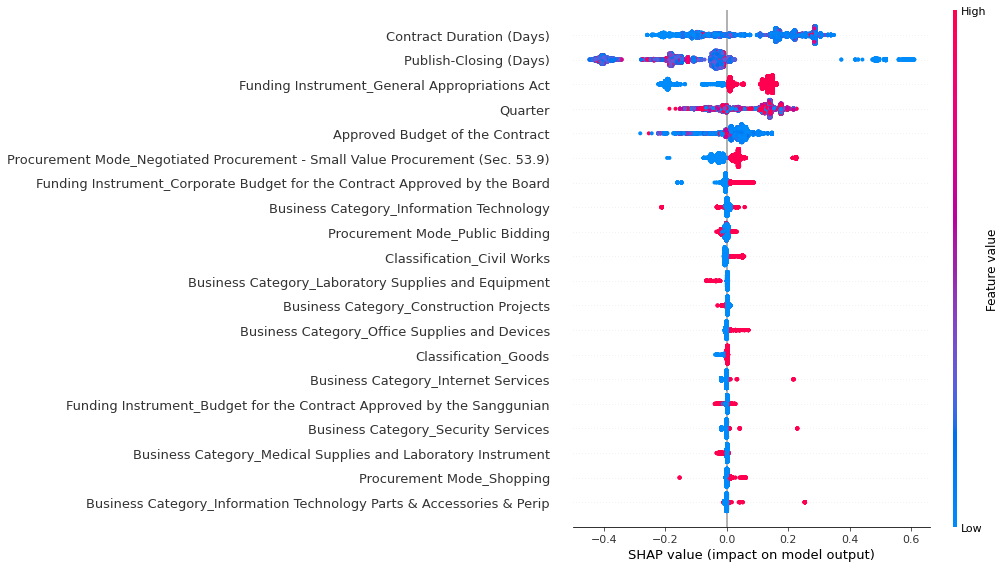

In [100]:
# get summary plot (bee swarm)
shap.summary_plot(shap_values[1], X_holdout)

<div align="center">Figure 9. Bee Swarm Plot for Metro Manila Government Tenders.</div>

As shown in **Figure 9**, it could be somehow generalized that government tenders with shorter duration are most likely to be approved, given the fact that tenders having low contract durations tend to push the model output towards **1**. Looking at the contracts that have been awarded provides a hint that these awarded contracts are mostly goods and supplies that need to be delivered on short durations. 

It could be argued, however, that this may not be always the case as seen from clusters formed on the left side of the feature `Contract Duration (Days)`. To draw insights further, it could be seen that there is somehow a synergistic effect between these top features. It is noted that lower time allotted for the bidding process (i.e. time between from the time the government tender is published until the bidding is closed) generally results to a government tender in Metro Manila being unawarded. 

In contrast, it could be seen that if the funding source is coming from the National Government (i.e. from the General Appropriations Act) and the government tender is within the net financial contracting capacity (NFCC) of able bidders within Metro Manila (e.g. government tender for goods have generally lower approved budget of the contract), the government tender is more likely to be awarded. For instance, the posted tender is related to construction, there is a higher possibility that this contract might not be awarded possibly because there are no eiligible bidders in terms of NFCC. 

It is worth noting as well that government tenders in Metro Manila are likely to be awarded in the 2nd or 3rd quarter. This is to be expected since most government tenders in Metro Manila are usually posted in the 1st quarter of the year. It is also observed that a number of government tenders are also not awarded in any of the quarters which essentially mean that quarter (as shown in **Figure 9**) as a predictor should be used in conjunction with the other top features identified. Collectively, it could derived that these five features (and their combinatory effects) give a generalization on how government tenders are usually awarded in Metro Manila. 

The succeeding discussions provide examples on how these features affect the likelihood of a government tender in Metro Manila to be awarded.

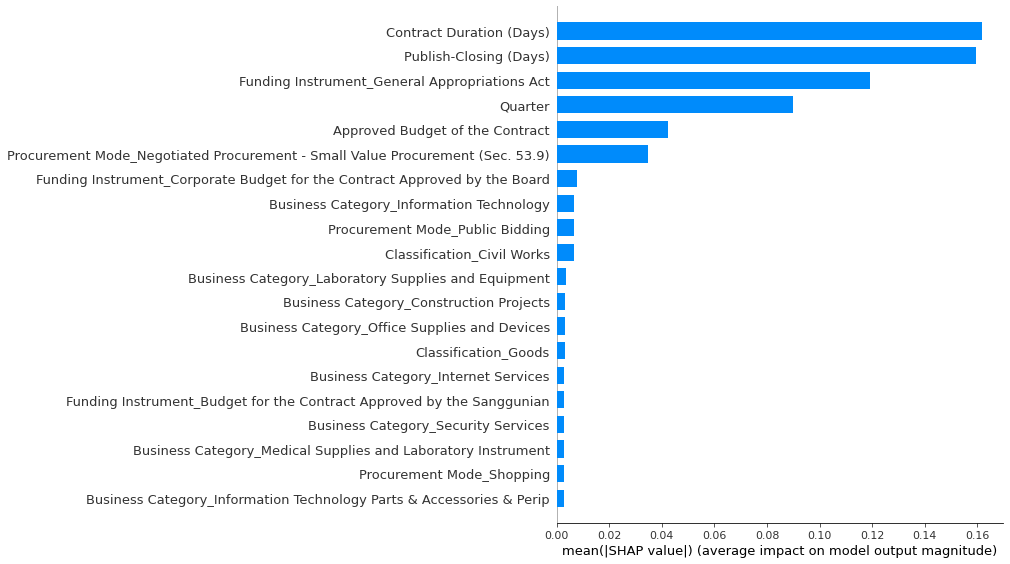

In [101]:
# get feature summary bar plot
shap.summary_plot(shap_values[1], features=X_holdout, feature_names=X_holdout.columns, plot_type='bar')

<div align="center">Figure 10. Feature Importance Plot for Metro Manila Government Tenders.</div>

### Decision Plots for Selected Metro Manila Government Tenders

This work also looked into selected contracts to understand how a particular government tender in Metro Manila is individually being awarded or not. 

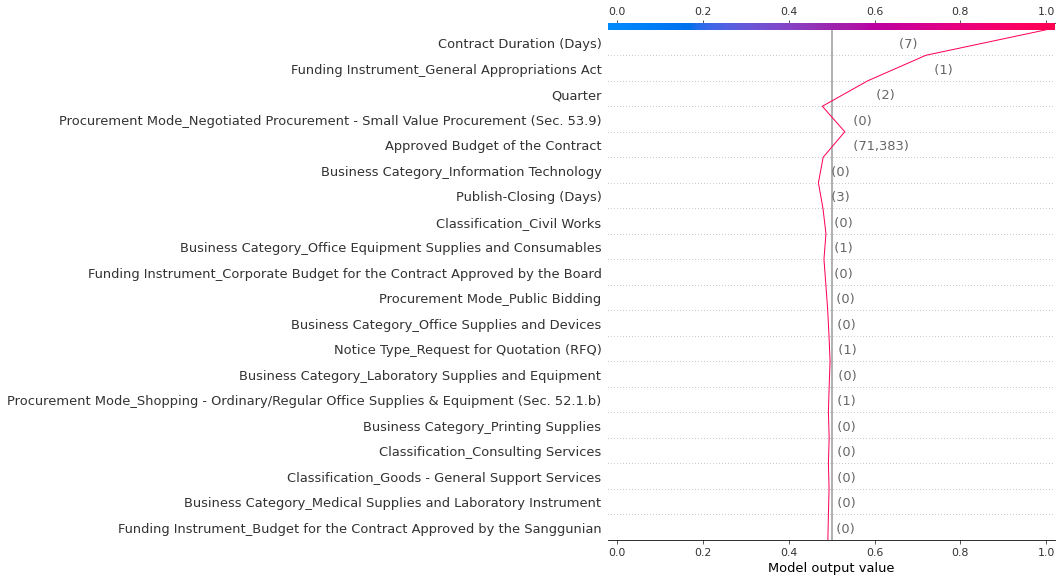

In [102]:
# get decision plot of the 1001st data on the holdout set
num=1000
shap.decision_plot(explainer.expected_value[1], shap_values[1][num], X_holdout.iloc[num])

<div align="center">Figure 11. Decision Plot for 1001st Metro Manila Government Tender (Holdout Set).</div>

For instance, for the 1001st contract in the holdout set for Metro Manila details how this contract was awarded based on the features identified as shown in **Figure 11**. It could be seen that for this particular contract that the short `Contract Duration (Days)` was the primary feature that pushed the model output towards **1**. 

Parallel to what was observed in **Figure 9** and **Figure 10**, it was seen that if the funding was indeed coming from the National Government, there is a high likelihood that the contract will be awarded. Furthermore, the date this was posted (`Quarter 2`) and the `Approved Budget of the Contract` makes it more attractive; hence, this contract was ultimately awarded. 

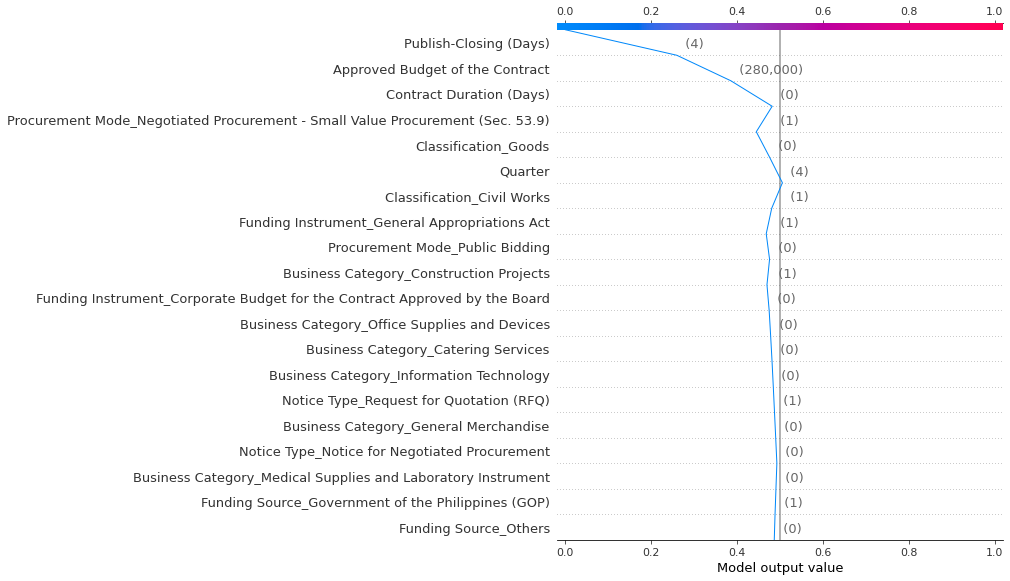

In [103]:
# get decision plot of the 15587th data on the holdout set
num=15586
shap.decision_plot(explainer.expected_value[1], shap_values[1][num], X_holdout.iloc[num])

<div align="center">Figure 12. Decision Plot for 15587th Metro Manila Government Tender (Holdout Set).</div>

In contrast, **Figure 12** shows the opposite of what was observed in **Figure 11**. This essentially mean that if the features of a contract are not geared towards these "attractive" features, the contract is likely to be not awarded. 

Collectively, these results provide further justification on what was observed in both **Figure 9** and **Figure 10** and give further insight on how a contract is awarded individually. These insights are collated and "exploited" further using `DICE` to suggest changes in the features of a contract to help increase its likelihood to be awarded in the next procurement cycle.

### Diverse Counterfactual Explanations for `Contract 16` (Metro Manila)

To maximize the explanations derived from the `SHAP` interpretations of the model for `Metro Manila`, `DICE` was subsequently used to provide suggested changes in a contract to help increase its likelihood of being awarded. Selected contracts have been inspected to sample insights on how unawarded contracts may be changed in order for it to be likely awarded.

In [104]:
df_dice_target = pd.DataFrame(df_dept_target)
df_dice_target.index = X.index

In [105]:
df_dice = pd.concat([X, df_dice_target], axis=1)

In [106]:
d_manila = dice_ml.Data(dataframe=df_dice.astype(float),
                      continuous_features=df_dice.drop('Notice Status', axis=1).columns.tolist(),
                      features_to_vary=numeric,
                      outcome_name='Notice Status')

# We provide the type of model as a parameter (model_type)
m_manila = dice_ml.Model(model=best_model, backend="sklearn", model_type='classifier')

In [107]:
exp_kdtree_manila = Dice(d_manila, m_manila, method="kdtree")

Using `DICE`, there are seven suggestions (`total_CFs=7`) wherein the unawarded `Contract 16` may increase its likelihood to be awarded. There are three options that the government could pursue to increase this contract's likelihood to be awarded in the next procurement cycle: 
- **(1)** the first is to increase its contract duration to 25 days to make it more attractive to bidders but lessening the duration of the call for interested bidders to 3 days
- **(2)** the second is to increase its duration of call for interested bidders to 22 days
- **(3)** the last viable option is to increase its contract duration days to 30 and repost this contract in the 3rd quarter.

These are just some of the suggestions for this contract. 

It could be highly argued that these suggestions would not be that accurate given the fact that the best performing model still misclassifies some of the awarded and unawarded contracts. However, this work strongly believes through the intervention of domain experts - the Bids and Awards Committee (BAC) - that these suggestions are very valuable as these recommendations empower and provide the BAC specific and "exact" options to explore in increasing the chances of an unawarded contract to be awarded. 

Coupling these suggestions with the experience and expertise the BAC will definitely prove beneficial in the entire bidding process as "exact values" are returned by these suggestions. The BAC can just eliminate, through their experience and expertise, options that are not viable towards a specific contract or project. 

Moreover, the number of returned suggestions here are set arbitrarily. If deemed necessary, more suggestions can be retrieved by increasing the desired number of counterfactuals to be returned. 

Collectively, these results show that the use of `DICE` in the bidding process is highly beneficial as a decision support tool for exploring possibilities to increase the likelihood of unawarded contracts to be awarded. 

In [109]:
# Single input
query_instances_manila = df_dice.drop('Notice Status', axis=1)[15:16]
genetic_manila = exp_kdtree_manila.generate_counterfactuals(query_instances_manila, total_CFs=7, desired_class=1)
genetic_manila.visualize_as_dataframe(show_only_changes=True)

100%|██████████| 1/1 [00:45<00:00, 45.35s/it]

Query instance (original outcome : 0)


,Approved Budget of the Contract,Contract Duration (Days),Publish-Closing (Days),Quarter,Classification_Civil Works,Classification_Consulting Services,Classification_Goods,Classification_Goods - General Support Services,Notice Type_Invitation to Apply for Eligibility and to Bid,Notice Type_Invitation to Bid (ITB),...,Procurement Mode_Shopping - Ordinary/Regular Office Supplies & Equipment (Sec. 52.1.b),Procurement Mode_Shopping - Unforeseen Contingency (Sec. 52.1.a),Trade Agreement_ADB Guidelines on the use of Consultants,Trade Agreement_ADB Procurement Guidelines,Trade Agreement_Implementing Rules and Regulations,Trade Agreement_International / Executive Agreement,Trade Agreement_Others,Trade Agreement_WB Guidelines on the use of Consultants,Trade Agreement_WB Procurement Guidelines,Notice Status
0,297331.0,10.0,6.0,1,0,0,1,0,0,0,...,1,0,0,0,1,0,0,0,0,0



Diverse Counterfactual set (new outcome: 1.0)


,Approved Budget of the Contract,Contract Duration (Days),Publish-Closing (Days),Quarter,Classification_Civil Works,Classification_Consulting Services,Classification_Goods,Classification_Goods - General Support Services,Notice Type_Invitation to Apply for Eligibility and to Bid,Notice Type_Invitation to Bid (ITB),...,Procurement Mode_Shopping - Ordinary/Regular Office Supplies & Equipment (Sec. 52.1.b),Procurement Mode_Shopping - Unforeseen Contingency (Sec. 52.1.a),Trade Agreement_ADB Guidelines on the use of Consultants,Trade Agreement_ADB Procurement Guidelines,Trade Agreement_Implementing Rules and Regulations,Trade Agreement_International / Executive Agreement,Trade Agreement_Others,Trade Agreement_WB Guidelines on the use of Consultants,Trade Agreement_WB Procurement Guidelines,Notice Status
14134,297332.0,25.0,3.0,-,-,-,-,-,-,-,...,-,-,-,-,-,-,-,-,-,1.0
61115,-,-,22.0,4.0,-,-,-,-,-,-,...,-,-,-,-,-,-,-,-,-,1.0
53091,-,-,3.0,4.0,-,-,-,-,-,-,...,-,-,-,-,-,-,-,-,-,1.0
1056,-,11.0,-,-,-,-,-,-,-,-,...,-,-,-,-,-,-,-,-,-,1.0
38554,297332.0,30.0,0.0,3.0,-,-,-,-,1.0,-,...,0.0,-,-,-,-,-,-,-,-,1.0
30149,297331.9,30.0,6.1,3.0,-,-,-,-,-,-,...,0.0,-,-,-,-,-,-,-,-,1.0
27991,297331.9,-,2.0,2.0,-,-,-,-,-,-,...,0.0,-,-,-,-,-,-,-,-,1.0


## Derived Insights for Cotabato

The succeeding sections provides discussion on what insights were derived on government tenders posted for areas within `Cotabato`.

### Preparation of Numeric and Categorical Features

For easier facilitation of the training and validation runs, the numeric and categoric columns for `Cotabato` were individually selected and then finally merged into a single feature containing dataframe. The target column which is the `Notice Status` - the feature that tells whether a government tender was awarded or not - was also separately extracted. This data then were finally split accordingly, resampled, and trained with various machine learning models.

In [112]:
# placeholder
df_dept = df_dept_cotabato
df_dept_target = df_dept_target_cotabato

In [113]:
# extract numeric columns from data from cleaned data
numeric = ['Approved Budget of the Contract', 'Contract Duration (Days)',
           'Publish-Closing (Days)', 'Quarter']
df_proc_2020_numeric = df_dept[numeric]

In [114]:
# extract categoric columns from data from cleaned data
categoric = ['Classification', 'Notice Type', 'Business Category',
               'Funding Source', 'Funding Instrument',
               'Procurement Mode', 'Trade Agreement']
df_proc_2020_categoric = df_dept[categoric]

In [115]:
# create dummy variables for categoric datafrmae
df_proc_2020_categoric_ohe = pd.get_dummies(
    df_proc_2020_categoric, columns = categoric)

In [116]:
# concat dataframe
df_proc_2020_feature = pd.concat([df_dept['Organization Name'],
                          df_dept['Reference ID'],
                          df_proc_2020_numeric, df_proc_2020_categoric_ohe], axis=1)

In [117]:
# reset index (for training and splitting, and backtracking)
df_proc_2020_feature_indexed = df_proc_2020_feature.reset_index(drop=True)

In [118]:
# extract feature column
df_feature = df_proc_2020_feature_indexed.drop(['Organization Name', 'Reference ID'], axis=1)

### Training and Validation Results

Similar with `Metro Manila`, the filtered data for Cotabato was also run in the same pipeline in order to determine what model best predicts whether a given contract will be awarded or not, five different machine learning models were tested in accordance to the metrics as previously discussed. `SMOTEENN`, `SMOTETOMEK`, and `Random Under Sampling` were also used to balance the procurement dataset. The results for the training and validation of the data are given in the succeeding cells below.

In [119]:
# initialize inputs: trainval and holdout set, use stratify=y, test_size=0.25

X, y = df_feature, df_dept_target # edit here

# scale data using standard scaler
# scaler = StandardScaler()
# X_scaled = pd.DataFrame(scaler.fit_transform(X))

(X_trainval, X_holdout, y_trainval, y_holdout) = train_test_split(X, y, # edit X here to include X_scaled in base case
                                           random_state=11, test_size=0.25, 
                                           stratify=y) # default

In [120]:
# refer to this website for the list of metrics: https://scikit-learn.org/stable/modules/model_evaluation.html
metric = 'recall'

In [121]:
# scaler
min_max = MinMaxScaler()

In [122]:
# resampling techniques
# refer to this website for more resampling techniques: https://imbalanced-learn.org/stable/references/under_sampling.html
smoteenn = SMOTEENN(random_state=11)
smotetomek = SMOTETomek(random_state=11)
random_under_sampler = RandomUnderSampler(random_state=11)

In [123]:
# initialize models with default hyperparamters
models_dict = {
    'LogisticRegressor': LogisticRegression(),
    'GaussianNB': GaussianNB(),
    'RandomForestClassifier': RandomForestClassifier(random_state=11),
    'DecisionTreeClassifier': DecisionTreeClassifier(random_state=11),
    'GradientBoostingClassifier': GradientBoostingClassifier(random_state=11)   
}

In [124]:
# scale data
X_trainval_scaled = min_max.fit_transform(X_trainval)

#### Resample with SMOTEENN

In [125]:
X_trainval_resampled, y_trainval_resampled = smoteenn.fit_resample(X_trainval_scaled, y_trainval)

In [126]:
X_trainval_resampled = pd.DataFrame(X_trainval_resampled, columns=X.columns)

In [127]:
# budget automl
skf = StratifiedKFold(n_splits=5)

res = {}

# log start time
total_start = time.time()

for model_name, model in tqdm(models_dict.items()):
    train_scores = []
    val_scores = []
    holdout_scores = []
    
    for train_index, val_index in skf.split(X_trainval_resampled, y_trainval_resampled):
        X_train, X_val = X_trainval_resampled.iloc[train_index], X_trainval_resampled.iloc[val_index]
        y_train, y_val = y_trainval_resampled.iloc[train_index], y_trainval_resampled.iloc[val_index]
        
        start_time = time.time() # for logging run times
        
        # fit
        model.fit(X_train, y_train)
        
        # predict
        y_pred_train = model.predict(X_train)
        y_pred_val = model.predict(X_val)
        y_pred_holdout = model.predict(X_holdout)
        
        # default metric: accuracy
        train_score = recall_score(y_train, y_pred_train)
        val_score = recall_score(y_val, y_pred_val)
        holdout_score = recall_score(y_holdout, y_pred_holdout)
        
        end_time = time.time() # for logging run times
        
        train_scores.append(train_score)
        val_scores.append(val_score)
        holdout_scores.append(holdout_score)
        
    res[model_name] = {
        'ave_train_recall':np.mean(train_scores) * 100,
        'ave_val_recall':np.mean(val_scores) * 100,
        'ave_holdout_recall':np.mean(holdout_scores) * 100,
        'run_time': end_time - start_time
    }

# log end time
total_end = time.time()

elapsed = total_end - total_start
print(f"Report Generated in {elapsed:.2f} seconds")
display(pd.DataFrame(res).T)

100%|██████████| 5/5 [00:42<00:00,  8.51s/it]

Report Generated in 42.54 seconds


,ave_train_recall,ave_val_recall,ave_holdout_recall,run_time
LogisticRegressor,65.178110,64.766024,0.000000,0.301194
GaussianNB,81.778828,81.646948,20.000000,0.116688
RandomForestClassifier,100.000000,98.863775,28.564356,1.997656
DecisionTreeClassifier,100.000000,97.051965,29.950495,0.193482
GradientBoostingClassifier,82.621059,81.748196,21.435644,5.694802


#### Resample with SMOTETOMEK

In [128]:
X_trainval_resampled, y_trainval_resampled = smotetomek.fit_resample(X_trainval_scaled, y_trainval)

In [129]:
X_trainval_resampled = pd.DataFrame(X_trainval_resampled, columns=X.columns)

In [130]:
# budget automl
skf = StratifiedKFold(n_splits=5)

res = {}

# log start time
total_start = time.time()

for model_name, model in tqdm(models_dict.items()):
    train_scores = []
    val_scores = []
    holdout_scores = []
    
    for train_index, val_index in skf.split(X_trainval_resampled, y_trainval_resampled):
        X_train, X_val = X_trainval_resampled.iloc[train_index], X_trainval_resampled.iloc[val_index]
        y_train, y_val = y_trainval_resampled.iloc[train_index], y_trainval_resampled.iloc[val_index]
        
        start_time = time.time() # for logging run times
        
        # fit
        model.fit(X_train, y_train)
        
        # predict
        y_pred_train = model.predict(X_train)
        y_pred_val = model.predict(X_val)
        y_pred_holdout = model.predict(X_holdout)
        
        # default metric: accuracy
        train_score = recall_score(y_train, y_pred_train)
        val_score = recall_score(y_val, y_pred_val)
        holdout_score = recall_score(y_holdout, y_pred_holdout)
        
        end_time = time.time() # for logging run times
        
        train_scores.append(train_score)
        val_scores.append(val_score)
        holdout_scores.append(holdout_score)
        
    res[model_name] = {
        'ave_train_recall':np.mean(train_scores) * 100,
        'ave_val_recall':np.mean(val_scores) * 100,
        'ave_holdout_recall':np.mean(holdout_scores) * 100,
        'run_time': end_time - start_time
    }

# log end time
total_end = time.time()

elapsed = total_end - total_start
print(f"Report Generated in {elapsed:.2f} seconds")
display(pd.DataFrame(res).T)

100%|██████████| 5/5 [01:02<00:00, 12.51s/it]

Report Generated in 62.57 seconds


,ave_train_recall,ave_val_recall,ave_holdout_recall,run_time
LogisticRegressor,63.309034,62.805164,0.000000,0.407909
GaussianNB,99.094457,98.894956,20.000000,0.131648
RandomForestClassifier,99.916680,97.052843,21.435644,2.683847
DecisionTreeClassifier,99.796087,94.684803,24.851485,0.277258
GradientBoostingClassifier,80.102161,79.345582,20.445545,8.651854


#### Resample with Random Under Sampling

In [131]:
X_trainval_resampled, y_trainval_resampled = random_under_sampler.fit_resample(X_trainval_scaled, y_trainval)

In [132]:
X_trainval_resampled = pd.DataFrame(X_trainval_resampled, columns=X.columns)

In [133]:
# budget automl
skf = StratifiedKFold(n_splits=5)

res = {}

# log start time
total_start = time.time()

for model_name, model in tqdm(models_dict.items()):
    train_scores = []
    val_scores = []
    holdout_scores = []
    
    for train_index, val_index in skf.split(X_trainval_resampled, y_trainval_resampled):
        X_train, X_val = X_trainval_resampled.iloc[train_index], X_trainval_resampled.iloc[val_index]
        y_train, y_val = y_trainval_resampled.iloc[train_index], y_trainval_resampled.iloc[val_index]
        
        start_time = time.time() # for logging run times
        
        # fit
        model.fit(X_train, y_train)
        
        # predict
        y_pred_train = model.predict(X_train)
        y_pred_val = model.predict(X_val)
        y_pred_holdout = model.predict(X_holdout)
        
        # default metric: accuracy
        train_score = recall_score(y_train, y_pred_train)
        val_score = recall_score(y_val, y_pred_val)
        holdout_score = recall_score(y_holdout, y_pred_holdout)
        
        end_time = time.time() # for logging run times
        
        train_scores.append(train_score)
        val_scores.append(val_score)
        holdout_scores.append(holdout_score)
        
    res[model_name] = {
        'ave_train_recall':np.mean(train_scores) * 100,
        'ave_val_recall':np.mean(val_scores) * 100,
        'ave_holdout_recall':np.mean(holdout_scores) * 100,
        'run_time': end_time - start_time
    }

# log end time
total_end = time.time()

elapsed = total_end - total_start
print(f"Report Generated in {elapsed:.2f} seconds")
display(pd.DataFrame(res).T)

100%|██████████| 5/5 [00:04<00:00,  1.04it/s]

Report Generated in 4.80 seconds


,ave_train_recall,ave_val_recall,ave_holdout_recall,run_time
LogisticRegressor,57.948426,54.084957,0.000000,0.050145
GaussianNB,33.319367,31.796075,80.000000,0.029921
RandomForestClassifier,99.917441,74.152637,48.316832,0.357048
DecisionTreeClassifier,99.834860,71.675679,23.069307,0.026970
GradientBoostingClassifier,69.529036,62.430364,29.950495,0.481709


#### Best Performing Machine Learning Model for Cotabato

Similar to what was done for `Metro Manila`, to determine what model describes best how a government tender is awarded in Cotabato, the holdout recall scores of the different machine learning models were also compared. 

As seen from **Table 4**, the `RandomForestClassifier` performed best with `Random Under Sampling` as its resampling technique. This model achieved a validation recall score **74.15%** and a holdout recall score of **48.32%**. It could be seen that the `GaussianNB` outperformed the rest of the machine learning models given that this achieved a holdout recall score of **80.0%**. However, with a validation recall score of **31.80%**, this model might have performed well probably due to the fact that the resampled instance were in favor of `GaussianNB`. 

Hence, the `RandomForestClassifier` was still chosen as the best machine learning model due to the very low validation recall score of `GaussianNB`. 

Finally, this best model was fed to `SHAP` and `DICE` to understand the impact of features towards an awarding of a government tender in `Cotabato`.

<div align="center">Table 4. Holdout Recall Scores in Machine Learning Models for Cotabato Government Tenders</div>

|Model| SMOTEENN | SMOTETomek | Random Under Sampler |
| :--- | :--- | :---- | :---- |
| LogisticRegression | 0.00% | 0.00%| 0.00% |
| GaussianNB | 20.00% |20.00%| 80.00% |
| RandomForestClassifier |28.56% | 21.44% | 48.32% |
| DecisionTreeClassifier |29.95% | 24.85% |23.07% |
| GradientBoostingClassifier | 21.44% | 20.45% | 29.95% |

### Explanation for Best Performing Model

To explain further how a contract in `Cotabato` is awarded, `SHAP` explanations were derived using the best performing machine learning model as seen from **Table 4**. The succeeding discussions detail the feature that is most relevant to awarding of government tenders in `Cotabato`.

In [134]:
# train best model at hypertuned parameters
best_model = RandomForestClassifier(random_state=11)
best_model.fit(X_trainval_resampled, y_trainval_resampled)

RandomForestClassifier(random_state=11)

In [135]:
# define explainer here
# reference: https://shap-lrjball.readthedocs.io/en/latest/example_notebooks/kernel_explainer/Diabetes%20regression.html
explainer = shap.TreeExplainer(
    best_model, feature_names = X.columns)

In [136]:
shap_values = explainer.shap_values(X_holdout)

Similar to what was done for `Metro Manila`, the bee swarm plot and feature importance plot for `Cotabato` was also plotted (see **Figure 13** and **Figure 14**, respectively). 

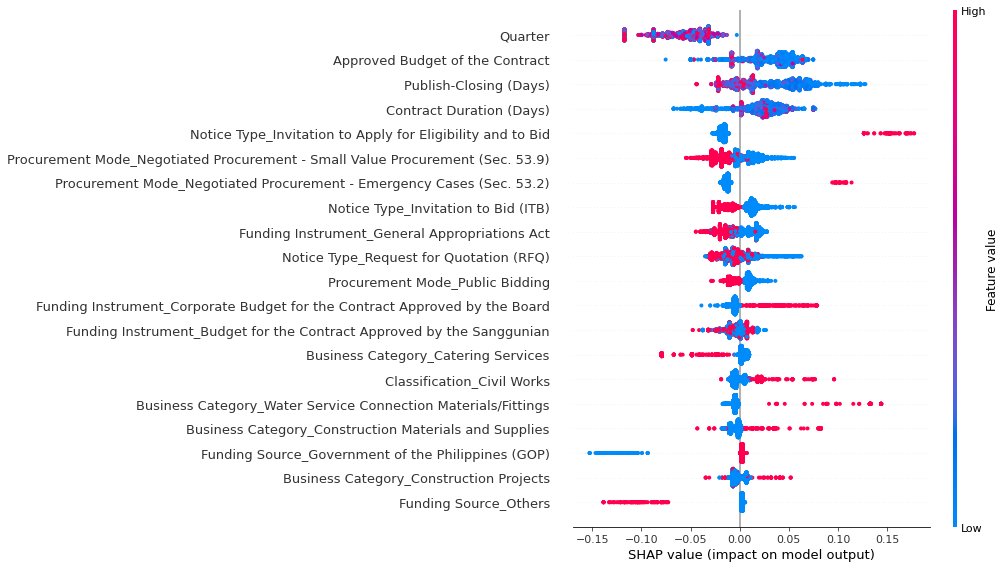

In [137]:
# get summary plot (bee swarm)
shap.summary_plot(shap_values[1], X_holdout)

<div align="center">Figure 13. Bee Swarm Plot for Cotabato Government Tenders.</div>

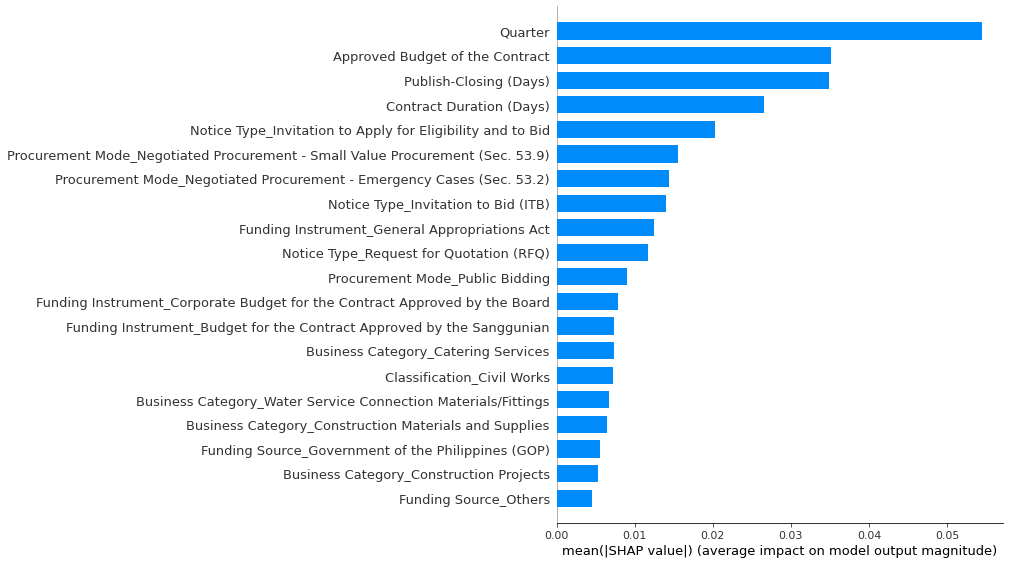

In [138]:
# get feature summary bar plot
shap.summary_plot(shap_values[1], features=X_holdout, feature_names=X_holdout.columns, plot_type='bar')

<div align="center">Figure 14. Feature Importance Plot for Cotabato Government Tenders.</div>

It could be seen that the top features observed for `Metro Manila` were also observed for `Cotabato` with the exception of `Quarter` being the most impactful feature and the mode of bidding being included in the top five most impactful features. 

In contrast to `Metro Manila`, it could be seen that regardless of quarter, government tenders in Cotabato have lesser likelihoods of being awarded than that of `Metro Manila` (though government tenders posted later in the year have the most negative impact to the model output). 

Similar observations to that of `Metro Manila` could be said for the features `Approved Budget of the Contract`, `Publish-Closing (Days)`, and `Contract Duration (Days)`. It then can be inferred from these results that construction projects generally have a lower likelihood of being awarded due to the fact that such contracts require bidders to be eligible (in terms of experience with simialr projects) and have higher NFCC. 

Competitive bidding as feature, if interpreted alone, determines that there two cluster of contracts - contracts that usually goes to competitive bidding (e.g. contracts that are likely to be awarded) and contracts that do not ultimately undergo competitive bidding due to its nature and subsequent failed bids with similar contracts. 

Likewise with what was observed with `Metro Manila` government tenders, a synergistic effect (i.e. feature interactions) between the top features identified mainly determines the likelihood of a contract to be awarded. 

To elaborate on this further, the succeeding discussions provide examples on how these features affect the likelihood of a government tender in Metro Manila to be awarded.

### Decision Plots for Selected Metro Manila Government Tenders

Similar to what was observed in the decision plots made for selected `Metro Manila` government tenders, it could be inferred that the decision plots as shown in **Figure 15** and **Figure 16** follow the same logic as those of **Figure 13** and **Figure 14**. 

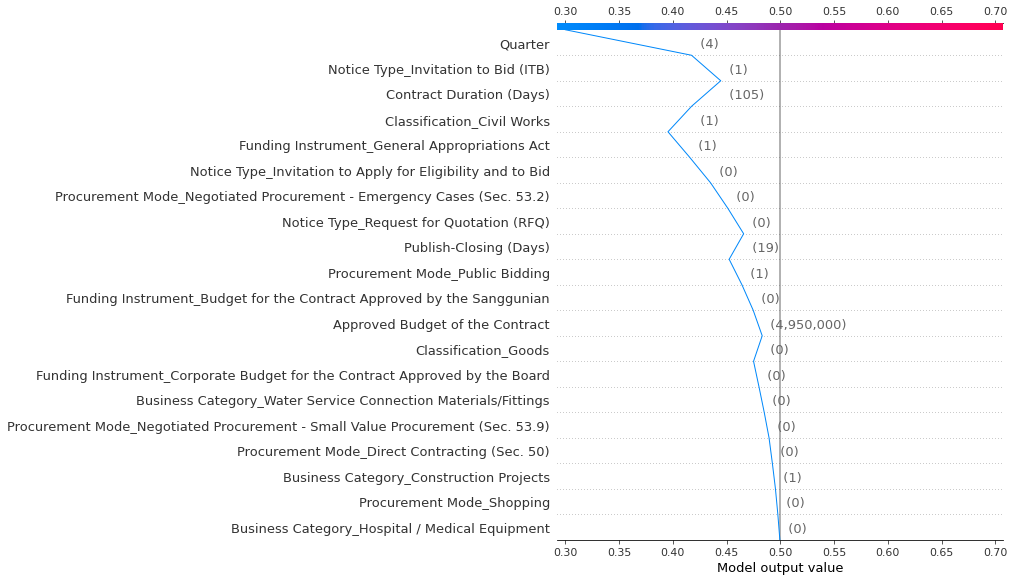

In [157]:
# get decision plot of the 4th data on the holdout set
num=3
shap.decision_plot(explainer.expected_value[1], shap_values[1][num], X_holdout.iloc[num])

<div align="center">Figure 15. Decision Plot for 4th Cotabato Government Tender (Holdout Set).</div>

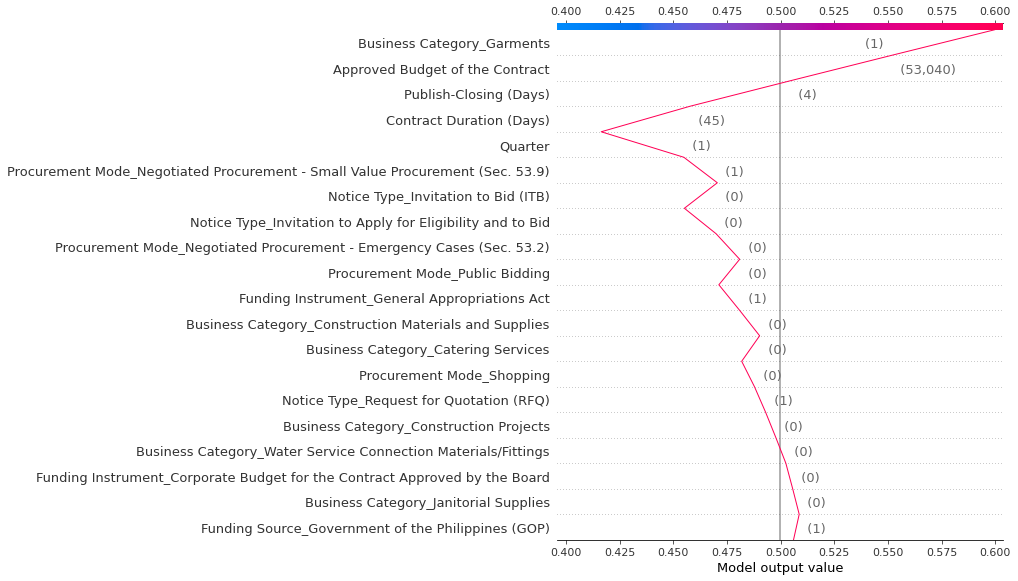

In [160]:
# get decision plot of the 24th data on the holdout set
num=23
shap.decision_plot(explainer.expected_value[1], shap_values[1][num], X_holdout.iloc[num])

<div align="center">Figure 16. Decision Plot for 23rd Cotabato Government Tender (Holdout Set).</div>

For instance, `Quarter` was seen to negatively impact the model output for the 4th contract in the holdout set for `Cotabato` contracts. This is parallel to what has been discussed previously. 

Similar to `Metro Manila` contracts, construction related projects have lesser likelihoods of being awarded given their nature and eligibility requirements (e.g. have been previously awarded with similar projects, have high NFCC, and have *very satisfactory* rating in terms of performance). These results clearly point to the fact that the imposed layers of eligibility requirements for awarding construction projects could be major pain-points on why such contracts have lesser likelihood to be approved. 

But then again, this is, of course, a great challenge for the procuring entity (and of the bidders) as such are the requirements of the Philippine procurement law to prevent anomalies in the public bidding process. 

Collectively, through the use of `DICE`, suggestions on how to improve the likelihood of these projects to be awarded are further explored in the succeeding section.

### Diverse Counterfactual Explanations for `Contract 17236` (Cotabato)

To maximize the explanations derived from the `SHAP` interpretations of the model for `Cotabato`, `DICE` was subsequently used to provide suggested changes in a contract to help increase its likelihood of being awarded. Selected contracts have been inspected to sample insights on how unawarded contracts may be changed in order for it to be likely awarded.

In [161]:
df_dice_target = pd.DataFrame(df_dept_target)
df_dice_target.index = X.index

In [162]:
df_dice = pd.concat([X, df_dice_target], axis=1)

In [163]:
d_cotabato = dice_ml.Data(dataframe=df_dice.astype(float),
                      continuous_features=df_dice.drop('Notice Status', axis=1).columns.tolist(),
                      features_to_vary=numeric,
                      outcome_name='Notice Status')

# We provide the type of model as a parameter (model_type)
m_cotabato = dice_ml.Model(model=best_model, backend="sklearn", model_type='classifier')

In [164]:
exp_kdtree_cotabato = Dice(d_cotabato, m_cotabato, method="kdtree")

Using `DICE`, there are also seven suggestions (`total_CFs=7`) wherein the unawarded `Contract 17236` may increase its likelihood to be awarded. There are two viable options that the government could pursue to increase this contract's likelihood to be awarded in the next procurement cycle: 
- **(1)** the first is to increase its contract duration to 8 days and have shorthen its call for interested bidders to four days acoount for the offset of the suggested increased contract duration.
- **(2)** the second is to increase its contract duration to 8 days and to repost this contract on the 1st quarter of the succeeding fiscal year since this contract was posted very late in the year (~Quarter 4).

Again, similar to suggestions derived what was implemented for `Contract 16` (`Metro Manila`), these are just some of the suggestions for this contract. It could also be highly argued that these suggestions would not be that accurate given the fact that the best performing model still misclassifies some of the awarded and unawarded contracts. However, as previously discussed, these results are best utilized through the BAC. Given the BAC's experience and expertise, these suggestions can be become very powerful given the fact that these suggestions provide "exact" numbers in increasing the likelihood of a contract to be awarded.

In [165]:
# Single input
query_instances_cotabato = df_dice.drop('Notice Status', axis=1)[17235:17236]
genetic_cotabato = exp_kdtree_cotabato.generate_counterfactuals(query_instances_cotabato, total_CFs=7, desired_class=1)
genetic_cotabato.visualize_as_dataframe(show_only_changes=True)

100%|██████████| 1/1 [00:03<00:00,  3.21s/it]

Query instance (original outcome : 0)


,Approved Budget of the Contract,Contract Duration (Days),Publish-Closing (Days),Quarter,Classification_Civil Works,Classification_Consulting Services,Classification_Goods,Classification_Goods - General Support Services,Notice Type_Invitation to Apply for Eligibility and to Bid,Notice Type_Invitation to Bid (ITB),...,Procurement Mode_Shopping,Procurement Mode_Shopping - Ordinary/Regular Office Supplies & Equipment (Sec. 52.1.b),Procurement Mode_Shopping - Unforeseen Contingency (Sec. 52.1.a),Trade Agreement_ADB Guidelines on the use of Consultants,Trade Agreement_ADB Procurement Guidelines,Trade Agreement_Implementing Rules and Regulations,Trade Agreement_International / Executive Agreement,Trade Agreement_Others,Trade Agreement_WB Procurement Guidelines,Notice Status
0,300000.0,7.0,7.0,4,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0



Diverse Counterfactual set (new outcome: 1.0)


,Approved Budget of the Contract,Contract Duration (Days),Publish-Closing (Days),Quarter,Classification_Civil Works,Classification_Consulting Services,Classification_Goods,Classification_Goods - General Support Services,Notice Type_Invitation to Apply for Eligibility and to Bid,Notice Type_Invitation to Bid (ITB),...,Procurement Mode_Shopping,Procurement Mode_Shopping - Ordinary/Regular Office Supplies & Equipment (Sec. 52.1.b),Procurement Mode_Shopping - Unforeseen Contingency (Sec. 52.1.a),Trade Agreement_ADB Guidelines on the use of Consultants,Trade Agreement_ADB Procurement Guidelines,Trade Agreement_Implementing Rules and Regulations,Trade Agreement_International / Executive Agreement,Trade Agreement_Others,Trade Agreement_WB Procurement Guidelines,Notice Status
12274,-,-,-,3.0,-,-,1.0,0.0,-,-,...,-,-,-,-,-,1.0,-,0.0,-,1.0
7490,-,7.1,-,2.0,-,-,1.0,0.0,-,-,...,-,-,-,-,-,1.0,-,0.0,-,1.0
134,-,-,7.1,1.0,-,-,1.0,0.0,-,-,...,-,-,-,-,-,1.0,-,0.0,-,1.0
2810,-,-,4.0,1.0,-,-,1.0,0.0,-,-,...,-,-,-,-,-,1.0,-,0.0,-,1.0
14921,-,8.0,4.0,-,-,-,1.0,0.0,-,-,...,-,-,-,-,-,1.0,-,0.0,-,1.0
15225,-,7.1,4.0,-,-,-,1.0,0.0,-,-,...,-,-,-,-,-,1.0,-,0.0,-,1.0
667,-,8.0,-,1.0,-,-,1.0,0.0,-,-,...,-,-,-,-,-,1.0,-,0.0,-,1.0


# Key Takeaways
In this report, we have successfully answered our research objectives. In creating a model using explainable machine leaerning, we were able to provide a precursor for a platform to improve procurement outcomes for both the **government as procuring entity** and the **companies/bidders as the service providers**. In so doing, we have arrived at the following key takeaways:

1. We have surfaced through SHAP that, for the procuring entities in Metro Manila and Cotabato, bids are more likely to succeed if they:<br>
   - have a **shorter contract duration**, as this can provide quicker turnaround in terms of the delivery of items *and* a quicker turnaround in payments for the supplier;
   - have their **funding source from the National Government**, as this reflect that these are administrative priorities; and
   - have a **higher contract budget**, as this can attract bidders and increase competition, given that they must bid for the lowest amount possible while providing items of the highest quality.<br> <br>
2. We have surfaced through DiCE that, for the bidders/companies, it is possible to use it as a tool to explain bid failures. Additionally, it provides specific and actionable examples to let them know which of their bids need to be changed so they can increase their chances of being successful.<br> <br>
3. By improving procurement outcomes for both the government and companies, we can provide the maximum value to the public when we purchase and release the items on time. Procurement is a multi-stakeholder effort to provide the Filipino public something that is needed, especially in times of an emergency.

# Recommendations
We suggest ways forward in order to improve on our model and/or to ensure sustainability of our efforts:
1. Moving forward, it is possible to extend this use case to include more data about each company's background information and historical bids. Specifically, it is possible to predict which companies will bid on which items. It is also possible to predict what is the bid range for each procurement item in the PhilGEPS database. <br><br>

2. With further finetuning and guidance from domain experts, the existing information provided by our model can already benefit the government, helping them to understand reasons for low awarding rates. They may provide policies that can promote competition, especially in areas where too few bids are made (usually these are the geographically isolated and disadvantaged areas). It may also serve as another monitoring platform, as it can identify which of the steps in the procurement pipeline take the longest time to process. <br><br>

3. Similarly, this can benefit bidders/companies as it would help them understand which of their bids can be further improved or changed when they submit another bid for other procurement items. Identifying areas with low competition may also assist in prioritizing which bids and government offices to focus on.

4. Finally, one recommendation for the methodology is to use Grid Search to exhaustively search for hyperparameter optimization. Limitations on time and resources has prevented us from doing Grid Search, but it may lead to more optimal and ideal results should this study be replicated.

# References

[1] Clarete, R.L., and Pascua, G.G.Y. (2016). The TPP agreement and government procurement: opportunities and issues for the Philippines. Philippine Journal of Development 43:2. Retireved from https://pidswebs.pids.gov.ph/CDN/PUBLICATIONS/pidspjd2016-2_procurement.pdf

[2] Department of Budget and Management (2020). PRRD signs the P4.506 Trillion National Budget for FY 2021. Department of Budget and Management Website. Retrieved from https://www.dbm.gov.ph/index.php/secretary-s-corner/press-releases/list-of-press-releases/1778-prrd-signs-the-p4-506-trillion-national-budget-for-fy-2021

[3] Philippine Government Electronic Procurement System, Modernized government e-procurement system. [Online]. Available: https://notices.philgeps.gov.ph/opendataSRD.html.

[4] S. M. Lundberg et al., “From local explanations to global understanding with explainable AI for trees,” Nature Machine Intelligence, vol. 2, no. 1. Springer Science and Business Media LLC, pp. 56–67, Jan. 2020. doi: 10.1038/s42256-019-0138-9.

[5] S. M. Lundberg et al., “Explainable machine-learning predictions for the prevention of hypoxaemia during surgery,” Nature Biomedical Engineering, vol. 2, no. 10. Springer Science and Business Media LLC, pp. 749–760, Oct. 2018. doi: 10.1038/s41551-018-0304-0.

[6] R. K. Mothilal, A. Sharma, and C. Tan, “Explaining machine learning classifiers through diverse counterfactual explanations,” Proceedings of the 2020 Conference on Fairness, Accountability, and Transparency. ACM, Jan. 22, 2020. doi: 10.1145/3351095.3372850.

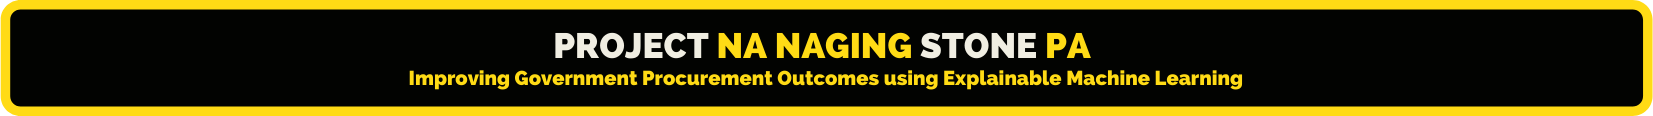